<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto tem o intuito de estudar Redes Neurais Artificiais e suas aplicações em Deep Learning </i>       
</p>  

# <font color='orange' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid orange;'>

In [1]:
## Bibliotecas Gerais 
import sys
sys.executable
import re

## Bibliotecas de Análise de Dados
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Bibliotecas de Manipulação de Tempo
from datetime import datetime, date, timedelta

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
from scipy.special import erf  # Para GELU
import random


# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder, OrdinalEncoder, KBinsDiscretizer, FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import CatBoostEncoder

# Bibliotecas de Modelos de Machine Learning
import joblib
from joblib import Parallel, delayed
import pickle
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, early_stopping
from sklearn.cluster import KMeans
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import networkx as nx
import shap

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, precision_recall_curve, average_precision_score, f1_score, log_loss, brier_score_loss, confusion_matrix, cohen_kappa_score, silhouette_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

%matplotlib inline

# Bibliotecas de Modelos de Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.cuda.amp import autocast, GradScaler
from torch.nn import init

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


from tqdm import tqdm
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("PyTorch version:", torch.__version__)
# print("CUDA available:", torch.cuda.is_available())
# print("CUDA version:", torch.version.cuda)
# print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

# Utils
from utils import plot
from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# pip freeze > requirements.txt

c:\Users\leova\anaconda3\envs\deep_learning_venv\lib\site-packages\hyperopt\atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
c:\Users\leova\anaconda3\envs\deep_learning_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <font color='orange' style='font-size: 40px;'> Funções de Ativação </font>
<hr style='border: 2px solid orange;'>

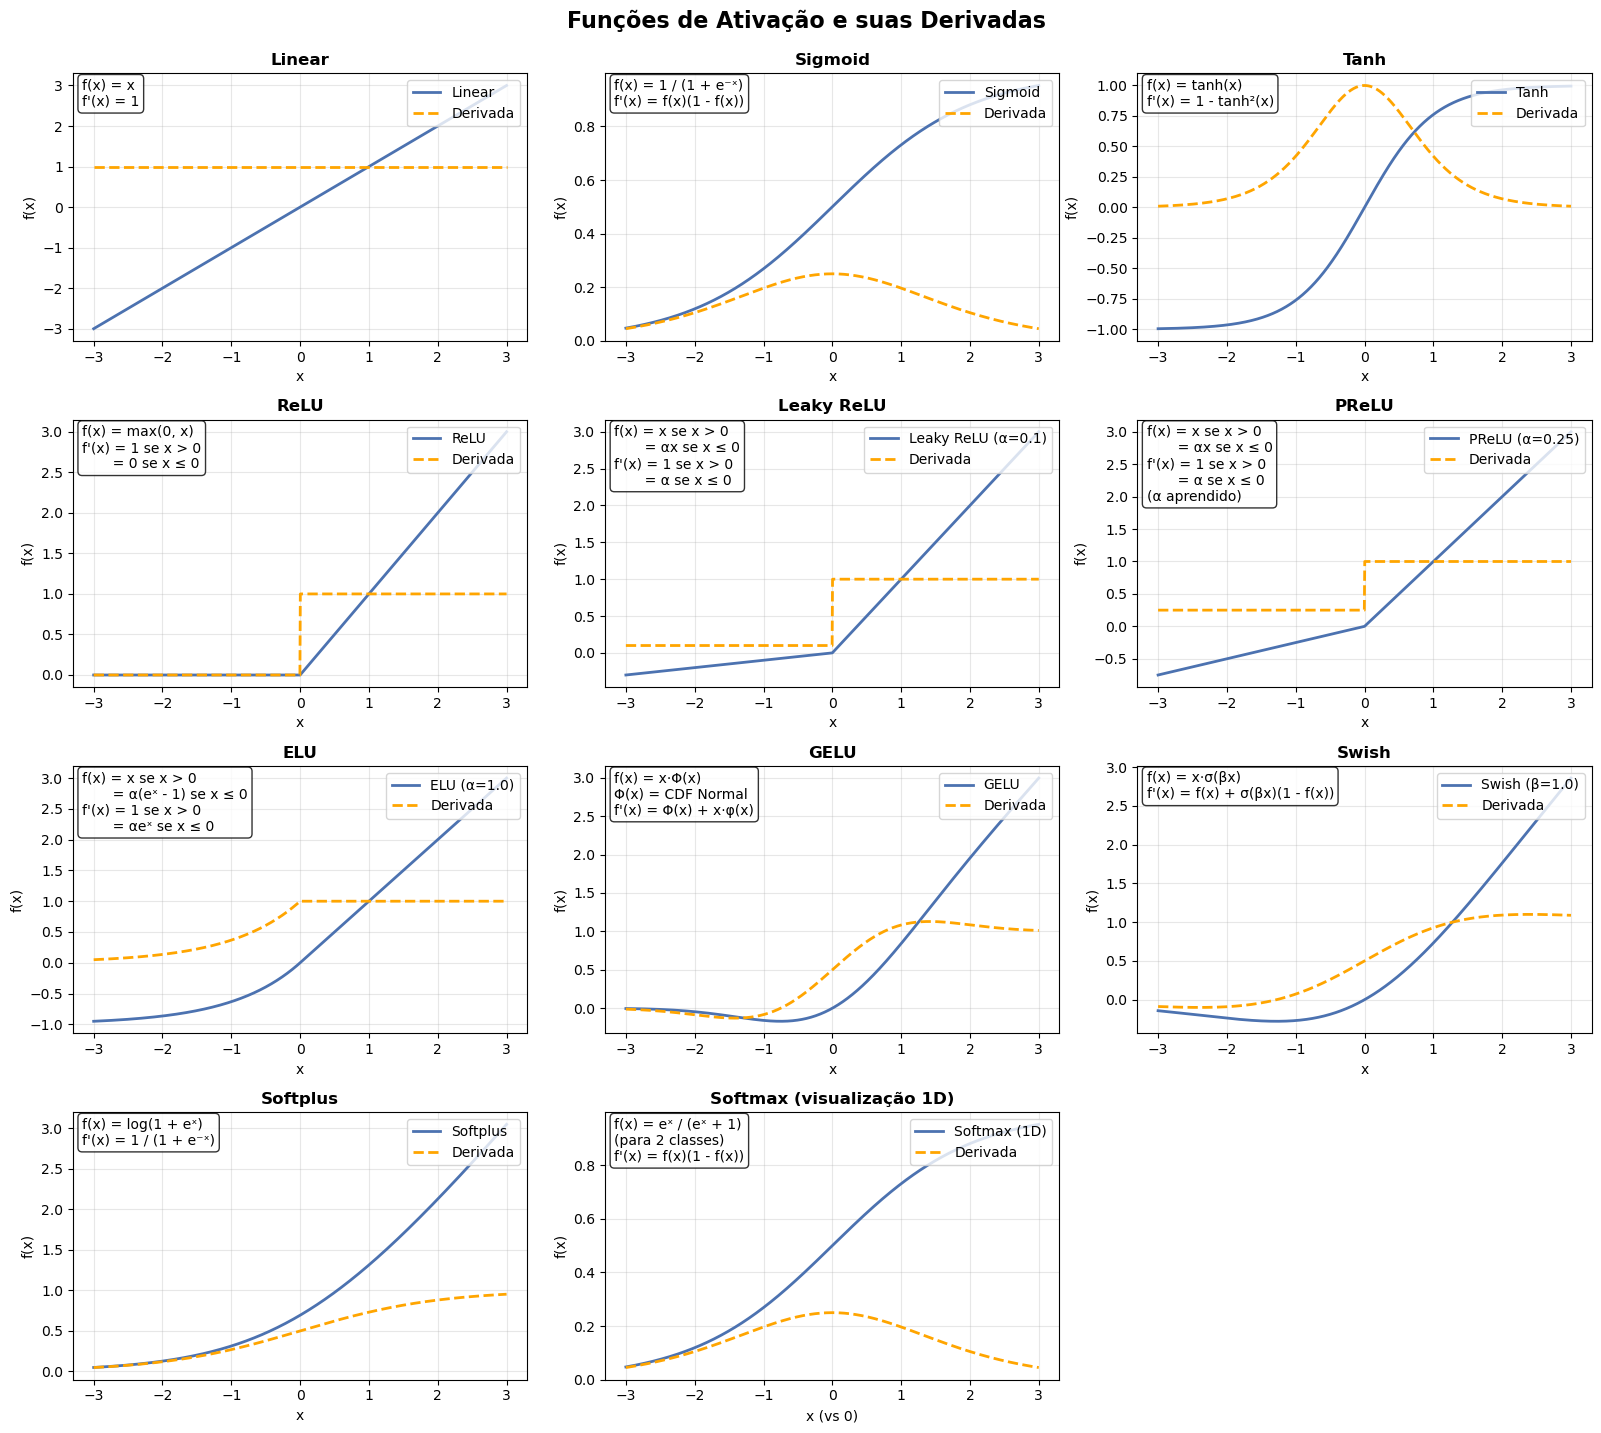

In [11]:
# Configurações gerais
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size'] = 10

# Criação da figura com subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

# Range de valores para x
x = np.linspace(-3, 3, 1000)

# 1. LINEAR
ax = axes[0]
y = x
dy = np.ones_like(x)
ax.plot(x, y, 'b-', linewidth=2, label='Linear')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Linear', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x\nf\'(x) = 1', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. SIGMOIDE
ax = axes[1]
y = 1 / (1 + np.exp(-x))
dy = y * (1 - y)
ax.plot(x, y, 'b-', linewidth=2, label='Sigmoid')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Sigmoid', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = 1 / (1 + e⁻ˣ)\nf\'(x) = f(x)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. TANGENTE HIPERBÓLICA
ax = axes[2]
y = np.tanh(x)
dy = 1 - y**2
ax.plot(x, y, 'b-', linewidth=2, label='Tanh')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Tanh', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = tanh(x)\nf\'(x) = 1 - tanh²(x)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. ReLU
ax = axes[3]
y = np.maximum(0, x)
dy = np.where(x > 0, 1, 0)
ax.plot(x, y, 'b-', linewidth=2, label='ReLU')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('ReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = max(0, x)\nf\'(x) = 1 se x > 0\n       = 0 se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. LEAKY ReLU (alpha=0.1)
ax = axes[4]
alpha = 0.1
y = np.where(x > 0, x, alpha * x)
dy = np.where(x > 0, 1, alpha)
ax.plot(x, y, 'b-', linewidth=2, label=f'Leaky ReLU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Leaky ReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = αx se x ≤ 0\nf\'(x) = 1 se x > 0\n       = α se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. PReLU (Parametric ReLU) com parâmetro aprendível = 0.25
ax = axes[5]
alpha = 0.25  # Valor de exemplo (normalmente aprendido)
y = np.where(x > 0, x, alpha * x)
dy = np.where(x > 0, 1, alpha)
ax.plot(x, y, 'b-', linewidth=2, label=f'PReLU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('PReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = αx se x ≤ 0\nf\'(x) = 1 se x > 0\n       = α se x ≤ 0\n(α aprendido)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 7. ELU (Exponential Linear Unit)
ax = axes[6]
alpha = 1.0
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))
dy = np.where(x > 0, 1, alpha * np.exp(x))
ax.plot(x, y, 'b-', linewidth=2, label=f'ELU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('ELU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = α(eˣ - 1) se x ≤ 0\nf\'(x) = 1 se x > 0\n       = αeˣ se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 8. GELU (Gaussian Error Linear Unit)
ax = axes[7]
y = 0.5 * x * (1 + erf(x / np.sqrt(2)))
# Derivada aproximada da GELU
dy_gelu = 0.5 * (1 + erf(x / np.sqrt(2))) + (x / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
ax.plot(x, y, 'b-', linewidth=2, label='GELU')
ax.plot(x, dy_gelu, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('GELU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x·Φ(x)\nΦ(x) = CDF Normal\nf\'(x) = Φ(x) + x·φ(x)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 9. SWISH (β=1)
ax = axes[8]
beta = 1.0
y = x / (1 + np.exp(-beta * x))
# Derivada do Swish
sigmoid = 1 / (1 + np.exp(-beta * x))
dy = sigmoid * (1 + beta * x * (1 - sigmoid))
ax.plot(x, y, 'b-', linewidth=2, label=f'Swish (β={beta})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Swish', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x·σ(βx)\nf\'(x) = f(x) + σ(βx)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 10. SOFTPLUS
ax = axes[9]
y = np.log(1 + np.exp(x))
dy = 1 / (1 + np.exp(-x))  # Sigmoide
ax.plot(x, y, 'b-', linewidth=2, label='Softplus')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Softplus', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = log(1 + eˣ)\nf\'(x) = 1 / (1 + e⁻ˣ)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 11. SOFTMAX (para um único valor, visualização 1D)
ax = axes[10]
# Para visualização 1D, consideramos softmax de [x, 0]
y = np.exp(x) / (np.exp(x) + np.exp(0))
# Derivada da softmax 1D
dy = y * (1 - y)  # Mesmo que sigmoide para 2 classes
ax.plot(x, y, 'b-', linewidth=2, label='Softmax (1D)')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Softmax (visualização 1D)', fontsize=12, fontweight='bold')
ax.set_xlabel('x (vs 0)')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = eˣ / (eˣ + 1)\n(para 2 classes)\nf\'(x) = f(x)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remover o último subplot não usado
axes[11].axis('off')

# Ajustar layout
plt.tight_layout()
plt.suptitle('Funções de Ativação e suas Derivadas', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Código para salvar a figura
# plt.savefig('funcoes_ativacao.png', dpi=300, bbox_inches='tight')

# <font color='orange' style='font-size: 40px;'> Backpropagation </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Gradiente Numérico (quando não sabemos calcular a derivada de uma função) </font>
<hr style='border: 2px solid green;'>

Imagine agora que a gente pega as entradas de um circuito e puxa-as para uma direção positiva. Essa força puxando $x$ e $y$ vai nos dizer como $x$ e $y$ devem mudar para aumentar a saída. Não entendeu? Vamos explicar:

Se olharmos para as entradas, a gente pode intuitivamente ver que a força em $x$ deveria sempre ser positiva, porque tornando $x$ um pouquinho maior de $x=-2$ para $x=-1$ aumenta a saída do circuito para $-3$, o que é bem maior que $-6$. Por outro lado, se a força em $y$ for negativa, tornando-o menor, como de $y=3$ para $y=2$, também aumenta a saída: $-2\times2 = -4$, de novo maior que $-6$.

E como calcular essa força? Usando **derivadas**.

> *A derivada pode ser pensada como a força que a gente aplica em cada entrada para aumentar a saída*

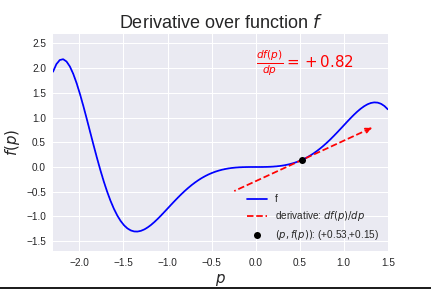


E como exatamente a gente vai fazer isso? Em vez de olhar para o valor de saída, como fizemos anteriormente, nós vamos iterar sobre as cada entrada individualmente, aumentando-as bem devagar e vendo o que acontece com a saída. **A quantidade que a saída muda é a resposta da derivada**.

Vamos para definição matemática. A derivada em relação a $x$ pode ser definida como:

$$\frac{\partial f(x,y)}{\partial x} = \frac{f(x+h,y) - f(x,y)}{h}$$

Onde $h$ é pequeno. Nós vamos, então, calcular a saída inicial $f(x,y)$ e aumentar $x$ por um valor pequeno $h$ e calcular a nova saída $f(x+h,y)$. Então, nós subtraimos esse valores para ver a diferença e dividimos por $h$ para normalizar essa mudança pelo valor (arbitrário) que nós usamos.

Em termos de código, teremos:


In [5]:
def forwardMultiplyGate(a, b):
    return a*b

x, y = -2, 3
out = forwardMultiplyGate(x,y)
h = 0.0001

# derivada em relação a x
out2 = forwardMultiplyGate(x + h, y)
derivada_x = (out2 - out)/h

# derivada em relação a y
out3 = forwardMultiplyGate(x, y + h)
derivada_y = (out3 - out)/h

print(out2, out3)
print(derivada_x, derivada_y)

-5.9997 -6.0002
3.00000000000189 -2.0000000000042206


Como a gente pode ver, a derivada em relação a $x$ é igual a $+3$. O sinal positivo indica que alterando o valor de $x$ pelo passo $h$, a saída se torna maior. O valor $3$ pode ser considerado como o valor da força que puxa $x$. O inverso acontece com $y$.

> *A derivada em relação a alguma entrada pode ser calculada ajustando levemente aquela entrada e observando a mudança no valor da saída*

A derivada é calculada sobre cada entrada, enquanto o **gradiente** representa todas as derivadas sobre as entradas concatenadas em um vetor.

In [6]:
x, y = -2, 3
passo = 0.01 
out = forwardMultiplyGate(x,y)
x = x + passo * derivada_x 
y = y + passo * derivada_y 

out_new = forwardMultiplyGate(x,y) 

print(out_new)

-5.87059999999986


**Passo maior nem sempre é melhor**: É importante destacar que qualquer valor de passo maior que 0.01 ia sempre funcionar melhor (por exemplo, passo = 1 gera a saída = 1). No entanto, à medida que os circuitos vão ficando mais complexos (como em redes neurais completas), a função vai ser tornando mais caótica e complexa. O gradiente garante que se você tem um passo muito pequeno (o ideal seria infinitesimal), então você definitivamente aumenta a saída seguindo aquela direção. O passo que estamos utilizando (0.01) ainda é muito grande, mas como nosso circuito é simples, podemos esperar pelo melhor resultado. Lembre-se da analogia do **escalador cego**.

# <font color='green' style='font-size: 30px;'> 1.2) Gradiente Analítico (quando sabemos a derivada de uma função) </font>
<hr style='border: 2px solid green;'>

A estratégia que utilizamos até agora de ajustar levemente a entrada e ver o que acontece com a saída pode não ser muito cômoda na prática quando temos milhares de entradas para ajustar. Então, a gente precisa de algo melhor.

Felizmente, existe uma estratégia mais fácil e muito mais rápida para calcular o gradiente: podemos usar cálculo para derivar diretamente a nossa função. Chamamos isso de **gradiente analítico** e dessa forma não precisamos ajustar levemente nada. 

> *O gradiente analítico evita o leve ajustamento das entradas. O circuito pode ser derivado usando cálculo.*

É muito fácil calcular derivadas parciais para funções simples como $x*y$. Se você não lembra da definição, aqui está o cálculo da derivada parcial em relação a $x$ da nossa função $f(x,y)$:

$$\frac{\partial f(x,y)}{\partial x} = \frac{f(x+h,y) - f(x,y)}{h}
= \frac{(x+h)y - xy}{h}
= \frac{xy + hy - xy}{h}
= \frac{hy}{h}
= y$$

A derivada parcial em relação em $x$ da nossa $f(x,y)$ é igual $y$. Você reparou na coincidência de $\partial x = 3.0$, que é exatamente o valor de $y$? E que o mesmo aconteceu para $x$? **Então, a gente não precisa ajustar nada!** E nosso código fica assim:


In [7]:
x, y = -2, 3
out = forwardMultiplyGate(x,y)

derivada_x = y 
derivada_y = x

passo = 0.01 

x = x + passo * derivada_x 
y = y + passo * derivada_y 

out_new = forwardMultiplyGate(x,y) 

print(out_new)

-5.8706


# <font color='green' style='font-size: 30px;'> 1.3) Múltiplas Portas e o uso da Regra da Cadeia </font>
<hr style='border: 2px solid green;'>

Calcular o gradiente para o nosso circuito foi trivial. Mas, e em circuitos mais complexos? Como a gente vai ver agora, cada porta pode ser tratada individualmente e a gente pode calcular derivadas locais como a gente fez anteriormente. Vamos considerar nossa função agora como a seguinte:

$$f(x,y,z) = (x+y)*z$$

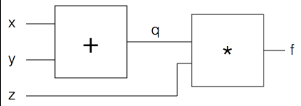

Como vamos calcular agora a nossa derivada? Primeiramente, vamos esquecer da porta de soma e fingir que temos apenas duas entradas no nosso circuito: **q** e **z**. Como já vimos, as nossas derivadas parciais podem ser definidas da seguinte maneira:

$$f(q,z) = q z \hspace{0.5in} \implies \hspace{0.5in} \frac{\partial f(q,z)}{\partial q} = z, \hspace{1in} \frac{\partial f(q,z)}{\partial z} = q$$

Ok, mas e em relação a $x$ e $y$? Como $q$ é calculado em função de $x$ e $y$ (pela adição em nosso exemplo), nós também podemos calcular suas derivadas parciais:

$$q(x,y) = x + y \hspace{0.5in} \implies \hspace{0.5in} \frac{\partial q(x,y)}{\partial x} = 1, \hspace{1in} \frac{\partial q(x,y)}{\partial y} = 1$$

Correto! As derivadas parciais são 1, independentemente dos valores de $x$ e $y$. Isso faz sentido se pensarmos que para aumentar A saída de uma porta de adição, a gente espera uma força positiva tanto em $x$ quanto em $y$, independente dos seus valores.

Com as fórmulas acima, nós sabemos calcular o gradiente da saída em relação a $q$ e $z$, e o gradiente de $q$ em relação a $x$ e $y$. Para calcular o gradiente do nosso circuito em relação a $x$, $y$ e $z$, nós vamos utilizar a **Regra da Cadeia**, que vai nos dizer como combinar esses gradientes. A derivada final em relação a $x$, será dada por:

$$\frac{\partial f(q,z)}{\partial x} = \frac{\partial q(x,y)}{\partial x} \frac{\partial f(q,z)}{\partial q}$$

Pode parecer complicado à primeira vista, mas a verdade é que isso vai ser simplificado a somente duas multiplicações:



In [16]:
def fowardAddGate(a, b):
    return a+b

def forwardMultiplyGate(a, b):
    return a*b

def fowardCircuit(x, y, z):
    q = fowardAddGate(x, y)
    f = forwardMultiplyGate(q, z) 
    return f

x, y, z = -2, 5, -4

print('Objetivo é chegar no valor:', fowardCircuit(x, y, z))



# Derivada da porta de multiplicação
derivada_f_relacao_z = fowardAddGate(x, y)
derivada_f_relacao_q = z

# Derivada da porta de adição
derivada_q_relacao_x = 1 
derivada_q_relacao_y = 1 

# Regra da cadeia
derivada_f_relacao_x = derivada_f_relacao_q * derivada_q_relacao_x 
derivada_f_relacao_y = derivada_f_relacao_q * derivada_q_relacao_y

print('Derivadas parciais:')
print('derivada_f_relacao_x:', derivada_f_relacao_x)
print('derivada_f_relacao_y:', derivada_f_relacao_y)
print('derivada_f_relacao_z:', derivada_f_relacao_z)

print('gradiente_relacao_xyz:', [derivada_f_relacao_x, derivada_f_relacao_y, derivada_f_relacao_z])

passo = 0.01

x = x + passo * derivada_f_relacao_x
y = y + passo * derivada_f_relacao_y
z = z + passo * derivada_f_relacao_z

print('Chegamos no valor:', fowardCircuit(x, y, z))

Objetivo é chegar no valor: -12
Derivadas parciais:
derivada_f_relacao_x: -4
derivada_f_relacao_y: -4
derivada_f_relacao_z: 3
gradiente_relacao_xyz: [-4, -4, 3]
Chegamos no valor: -11.5924


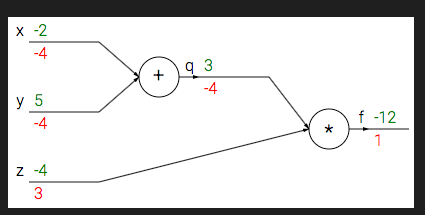

Vamos agora analisar os resultados separadamente. Analisando primeiramente $q$ e $z$, vemos que o circuito quer que $z$ aumente (der_f_rel_z = +3) e o valor de $q$ diminua (der_f_rel_q = -4) com uma força maior (4 contra 3).

Em relação a porta de soma, como vimos, o padrão é que aumentando as entradas a saída também aumenta. Porém, o circuito quer que $q$ diminua (der_f_rel_q = -4). Esse é o **ponto crucial**: em vez de aplicarmos uma força de +1 as entradas da porta de soma como normalmente faríamos (derivada local), o circuito quer que os gradientes em $x$ e $y$ se tornem 1x-4=-4. Isso faz sentido: o circuito quer $x$ e $y$ pequeno para que $q$ seja pequeno também, o que vai aumentar $f$.

# <font color='green' style='font-size: 30px;'> 1.4) Derivando Sigmóide </font>
<hr style='border: 2px solid green;'>

Qualquer função diferenciável pode atuar como uma porta, como também podemos agrupar múltiplas portas para formar uma simples porta, ou decompor um função em múltiplas portas quando for conveniente. Para exemplificar, vamos utilizar a função de ativação *sigmoid* com entradas **x** e pesos **w**:

$$f(w,x) = \frac{1}{1+e^{-(w_0x_0 + w_1x_1 + w_2)}}$$

Como dito, a função acima nada mais é que a função sigmoid $\sigma(x)$. Sabendo, então, que a derivada da função sigmoid é:

$$\sigma(x)=\frac{1}{1+e^{-x}}=(1-\sigma(x))\sigma(x)$$

Vamos calcular a gradiente em relação as entradas:

In [ ]:
w0, w1, w2 = 2, -3, -3 
x0, x1 = -1, -2 

# Forward Pass
dot = w0*x0 + w1*x1 + w2 
f = 1/(1+np.exp(-dot))

# Backward Pass
df = 1 # Valor Inicial
ddot = (1-f)*f*df
dx0 = w0 * ddot 
dw0 = x0 * ddot
dx1 = w1 * ddot 
dw1 = x1 * ddot 
dw2 = 1 * ddot 

print(dx0, dx1, dw0, dw1, dw2)

# Nova Saída
step = 0.001 
w0 = w0 + step*dw0 
w1 = w1 + step*dw1 
w2 = w2 + step*dw2
x0 = x0 + step*dx0 
x1 = x1 + step*dx1

new_dot = w0*x0 + w1*x1 + w2
new_f = 1/(1+np.exp(-new_dot))
print()
print(f, new_f)


0.3932238664829637 -0.5898357997244456 -0.19661193324148185 -0.3932238664829637 0.19661193324148185

0.7310585786300049 0.731792443510539


> 1. Derivadas Mais Comuns (Essenciais)

$$
f(x) = \frac{1}{x} \rightarrow \frac{df}{dx} = -\frac{1}{x^2}
$$

$$
f_c(x) = c + x \rightarrow \frac{df}{dx} = 1
$$

$$
f_a(x) = ax \rightarrow \frac{df}{dx} = a
$$

---

> 2. Potência, Exponencial e Logaritmo

$$
f(x) = x^2 \rightarrow \frac{df}{dx} = 2x
$$

$$
f(x) = x^n \rightarrow \frac{df}{dx} = nx^{n-1}
$$

$$
f(x) = \sqrt{x} \rightarrow \frac{df}{dx} = \frac{1}{2\sqrt{x}}
$$

$$
f(x) = e^x \rightarrow \frac{df}{dx} = e^x
$$

$$
f(x) = \log(x) \rightarrow \frac{df}{dx} = \frac{1}{x}
$$

---

> 3. Portas Binárias Básicas

$$
f(x, y) = x + y \rightarrow 
\begin{cases}
\frac{\partial f}{\partial x} = 1 \\
\frac{\partial f}{\partial y} = 1
\end{cases}
$$

$$
f(x, y) = x - y \rightarrow 
\begin{cases}
\frac{\partial f}{\partial x} = 1 \\
\frac{\partial f}{\partial y} = -1
\end{cases}
$$

$$
f(x, y) = xy \rightarrow 
\begin{cases}
\frac{\partial f}{\partial x} = y \\
\frac{\partial f}{\partial y} = x
\end{cases}
$$

---

> 4. Funções Exponenciais Escaladas

$$
f(x) = e^{ax} \rightarrow \frac{df}{dx} = a e^{ax}
$$

---

> 5. Funções de Ativação

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \rightarrow 
\frac{d\sigma}{dx} = \sigma(x)\big(1 - \sigma(x)\big)
$$

$$
\tanh(x) \rightarrow \frac{d}{dx}\tanh(x) = 1 - \tanh^2(x)
$$

$$
\text{ReLU}(x) = \max(0, x) \rightarrow 
\frac{d}{dx}\text{ReLU}(x) =
\begin{cases}
1, & x > 0 \\
0, & x \le 0
\end{cases}
$$

---

> 6. Portas Binárias Avançadas

$$
f(x, y) = \frac{x}{y} \rightarrow 
\begin{cases}
\frac{\partial f}{\partial x} = \frac{1}{y} \\
\frac{\partial f}{\partial y} = -\frac{x}{y^2}
\end{cases}
$$

---

> 7. Backpropagation

Como podemos calcular a derivada em relação às entradas agora?

**Usando Backpropagation!!**

Em backpropagation, cada expressão acima representa a **derivada local** de uma porta no grafo computacional. O gradiente total é obtido pela aplicação iterativa da **regra da cadeia**:

$$
\frac{\partial L}{\partial x}
=
\frac{\partial L}{\partial f}
\cdot
\frac{\partial f}{\partial x}
$$


# <font color='green' style='font-size: 30px;'> 1.5) Backpropagation </font>
<hr style='border: 2px solid green;'>

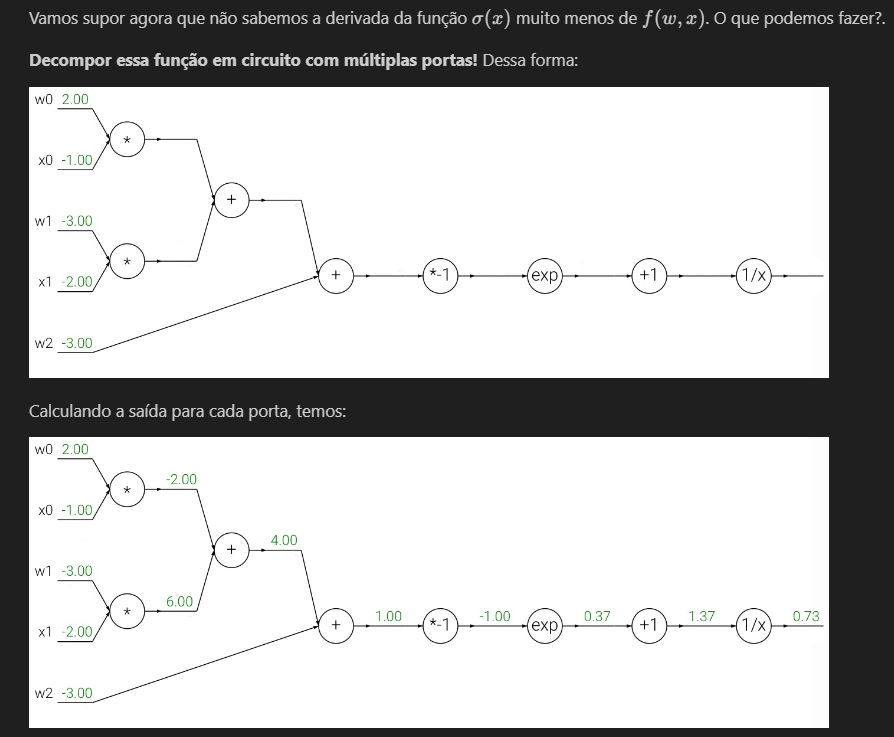

Onde sabemos as seguintes derivadas:

$$f(x) = \frac{1}{x} \rightarrow \frac{df}{dx} = -1/x^2 
\\\\
f_c(x) = c + x \rightarrow \frac{df}{dx} = 1 
\\\\
f(x) = e^x \rightarrow \frac{df}{dx} = e^x
\\\\
f_a(x) = ax \rightarrow \frac{df}{dx} = a$$

Onde as funções $f_c(x)$ e $f_a(x)$ transladam a entrada por uma constante $c$ e escala por uma contante $a$, respectivamente. Na verdade, são apenas casos especias de adição e multiplicação, mas que foram introduzidos como portas unárias.

Como podemos calcular a derivada em relação as entradas agora? **Usando Backpropagation!!**

Antes de resolver o circuito acima, vamos praticar um pouco de backpropagation com alguns exemplos. Vamos esquecer funções por enquanto e trabalhar só com 4 variáveis: $a$, $b$, $c$, e $x$. Vamos também nos referir as seus gradientes como $da$, $db$, $dc$, e $dx$. Além disso, vamos assumir que $dx$ é dado (ou é +1 como nos casos acima). Nosso primeiro exemplo é a porta $*$, que já conhecemos:

$$x  = a * b$$

$$da = b * dx$$
$$db = a * dx$$

Se você reparar bem, vai perceber que a porta $*$ atua como um *switcher* durante a backpropagation, ou seja, o gradiente de cada entrada é o valor da outra multiplicado pelo gradiente da anterior (regra da cadeia). Por outro lado, vamos analisar a porta +:

$$x  = a + b$$

$$da = 1.0 * dx$$
$$db = 1.0 * dx$$

Nesse caso, 1.0 é o gradiente local e a multiplicação é a nossa regra da cadeia. **E se fosse a adição de 3 números?**:

$$q = a + b$$
$$x = q + c$$

$$dc = 1.0 * dx$$
$$dq = 1.0 * dx$$
$$da = 1.0 * dq$$
$$db = 1.0 * dq$$

Você percebe o que está acontecendo? Se você olhar nos diagramas dos circuitos que já resolvemos, vai perceber que a porta + simplesmente pega o gradiente atual e roteia igualmente para todas as entradas (porque os gradientes locais são sempre 1.0 para todas as entradas, independente dos seus valores atuais). Então, podemos fazer bem mais rápido:

$$x = a + b + c$$

$$da = 1.0 * dx$$
$$db = 1.0 * dx$$
$$dc = 1.0 * dx$$

Okay. Mas, e se combinarmos portas?

$$x = a*b + c$$

$$da = b * dx$$
$$db = a * dx$$
$$dc = 1.0 * dx$$

Se você não percebeu o que aconteceu, introduza uma variável temporária $q = a * b$ e então calcula $x = q + c$ para se convencer. E quanto a este exemplo:

$$x = a * a$$
$$da = 2 * a * dx$$

Outro exemplo:

$$x = a*a + b*b + c*c$$
$$da = 2 * a * dx$$
$$db = 2 * b * dx$$
$$dc = 2 * c * dx$$

Ok. Agora mais complexo:

$$x = (a * b + c) * d)^2$$

Quando casos mais complexos como esse acontecem, eu gosto de dividir a expressão em partes gerenciáveis que são quase sempre compostas de simples expressões onde eu posso aplicar a regra da cadeia:

$$x1 = a * b + c$$
$$x2 = x1 * d$$
$$x = x2 * x2$$

$$dx2 = 2 * x2 * dx$$
$$dx1 = d * dx2$$
$$dd = x1 * dx2$$
$$da = b * dx1$$
$$db = a * dx1$$
$$dc = 1 * dx1$$

Não foi tão difícil! Essas são as equações para toda a expressão, e nós fizemos dividindo peça por peça e aplicando backpropagation a todas as variáveis. Note que **toda variável durante a fase forward tem uma variável equivalente na backpropagação que contém o gradiente em relação a saída do circuito.**. Mais um exemplo útil de função e seu gradiente local:

$$x = 1.0/a$$
$$da = 1.0/(a*a) * dx$$

E como ela pode ser aplicada na prática:

$$x = (a+b)/(c+d)$$

$$x1 = a + b$$
$$x2 = c + d$$
$$x3 = 1.0 / x2$$
$$x  = x1 * x3$$

$$dx1 = x3 * dx$$
$$dx3 = x1 * dx$$
$$dx2 = (1.0/(x2 * x2)) * dx3$$
$$dc = 1 * dx2$$
$$dd = 1 * dx2$$
$$da = 1 * dx1$$
$$db = 1 * dx1$$

E mais uma:

$$x = math.max(a, b)$$
$$da = x == a\ ?\ 1.0 * dx\ :\ 0.0$$
$$db = x == b\ ?\ 1.0 * dx\ :\ 0.0$$

No caso acima é mais difícil de entender. A função **max** passa o valor para a maior entrada e ignora as outras. Na fase de backpropagation, a porta __max__ simplesmente pega o gradiente atual e roteia para a entrada que teve o maior valor durante a fase de forward. A porta age como um simples switch baseado na entrada com o maior valor durante a forward. As outras entradas terão gradiente zero.

Agora, vamos dar uma olhada na porta **ReLU (*Rectified Linear Unit)***, muita usada em redes neurais no lugar da função sigmoid. Ela é simplesmente um threshold com zero:

$$x = max(a, 0)$$
$$da = a > 0\ ?\ 1.0 * dx\ :\ 0.0$$

Em outras palavras, essa porta simplesmente passa o valor adiante se ele é maior que zero, ou interrompe o fluxo e seta o valor para zero. Na backpropagação, a porta vai passar o gradiente atual se ele foi ativado durante a forward. Se a entrada original foi menor que zero, ela vai interromper o fluxo de gradiente.

Finalmente, vamos ver como calcular o gradiente em operações vetorizadas que vamos utilizar muito em redes neurais. Supondo que tivéssemos 3 amostras para classificar se são cachorro ou gato, e tivéssemos extraído 10 características das imagens, teríamos:

- Onde 5 é o número de neurônios, 10 são as dimensões
- Onde 3 é a quantidade de amostras, 10 são as dimensões
- É a matriz resultante da multiplicação das Entradas (X) pela Transposta dos Pesos (W), ou seja, [3,10] x [10, 5] = [3,5]
- A derivada de uma função tem que ter o mesmo Shape da função original. Se Y é uma matriz 3x5, a derivada também será 3x5

$$W = np.random.randn(5,10)$$
$$X = np.random.randn(3,10)$$
$$Y = X.dot(W^T)$$

Supondo que o gradiente de Y é dado como a seguir:
$$dY = np.random.randn(*Y.shape)$$
$$dW = dY^T.dot(X)$$
$$dX = dY.dot(W)$$

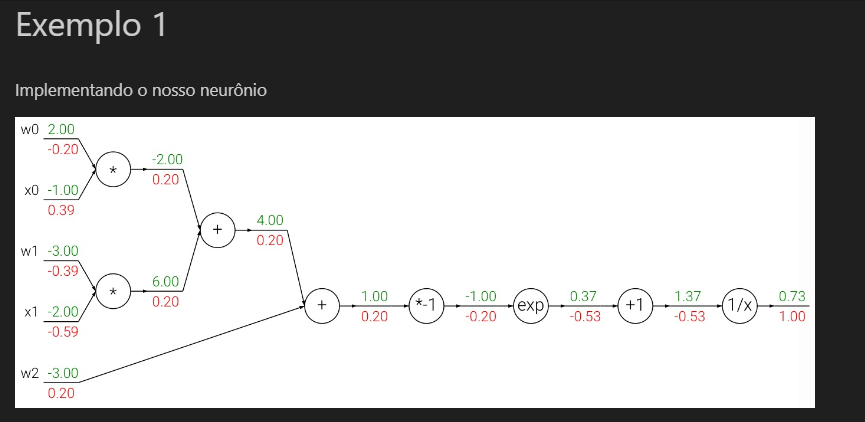


In [ ]:
w0, w1, w2 = 2, -3, -3
x0, x1 = -1, -2

# Forward Pass
mult1 = x0*w0 #(1)
mult2 = x1*w1 #(2)
add1 = mult1 + mult2 #(3)
add2 = w2 + add1 #(4)
neg = -1*add2 #(5)
exp1 = np.exp(neg) #(6)
add3 = 1 + exp1 #(7)
f = 1/add3 #(8)
print('Foward Pass:')
print(mult1, mult2, add1, add2, neg, exp1, add3, f)
print()
# Backward Pass
df = 1 # Valor Inicial
dadd3 = -1/(add3**2)*df #(8) 
dexp1 = 1*dadd3 #(7)
dneg = np.exp(neg)*dexp1 #(6)
dadd2 = -1*dneg #(5) 
dw2 = 1*dadd2 #(4)
dadd1 = 1*dadd2 #(4)
dmult1 = 1*dadd1 #(3)
dmult2 = 1*dadd1 #(3) 
dx1 = w1*dmult2 #(2)
dx2 = x1*dmult2 #(2)
dx0 = w0*dmult1 #(1)
dw0 = x0*dmult1 #(1) 
print('Backward Pass:')
print(df, dadd3, dexp1, dneg, dadd2, dw2, dadd1, dmult1, dmult2, dx1, dx2, dx0, dw0, sep = '\n' )

Foward Pass:
-2 6 4 1 -1 0.36787944117144233 1.3678794411714423 0.7310585786300049

Backward Pass:
1
-0.534446645388523
-0.534446645388523
-0.19661193324148188
0.19661193324148188
0.19661193324148188
0.19661193324148188
0.19661193324148188
0.19661193324148188
-0.5898357997244457
-0.39322386648296376
0.39322386648296376
-0.19661193324148188


In [ ]:
### Activate Functions
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

def leaky_relu(x, derivative=False):
    alpha = 0.1
    if derivative:
        return np.where(x <= 0, alpha, 1)
    return np.where(x <= 0, alpha*x, x)

def elu(x, derivative=False):
    alpha = 1.0
    if derivative:
        y = elu(x)
        return np.where(x <= 0, y + alpha, 1)
    return np.where(x <= 0, alpha*(np.exp(x) - 1), x)


def softmax(x, y_oh=None, derivative=False):
    if derivative:
        y_pred = softmax(x)
        k = np.nonzero(y_pred * y_oh)
        pk = y_pred[k]
        y_pred[k] = pk * (1.0 - pk)
        return y_pred
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

### Loss
def binary_cross_entropy(y, y_pred, derivative=False):
    if derivative:
        return -y(y - y_pred)
    return -np.mean(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))

def sigmoid_cross_entropy(y, y_pred, derivative = False):
    y_sigmoid = sigmoid(y_pred)
    if derivative:
        return -(y - y_sigmoid)/ y.shape[0]
    return -np.mean(y*np.log(y_sigmoid) + (1 - y)*np.log(1 - y_sigmoid))


def neg_log_likelihood(y_oh, y_pred, derivative=False):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    if derivative:
        y_pred[k] = (-1.0 / pk)
        return y_pred
    return np.mean(-np.log(pk))

def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    if derivative:
        return -(y_oh - y_softmax) / y_oh.shape[0]    
    return neg_log_likelihood(y_oh, y_softmax)

def mae(y, y_pred, derivative = False):
    if derivative:
        return np.where(y_pred > y, 1, -1)/y.shape[0]
    return np.mean(np.abs(y - y_pred))

def mse(y, y_pred, derivative = False):
    if derivative:
        return -y(y - y_pred)/y.shape[0]
    return 0.5*np.mean(((y - y_pred) ** 2))

In [41]:

x = np.array([[0.05, 0.1]])
y = np.array([[0.01, 0.99]])

w1 = np.array([[0.15, 0.2], [0.25, 0.3]])
b1 = np.array([[0.35]])

w2 = np.array([[0.4, 0.45], [0.5, 0.55]])
b2 = np.array([[0.6]])

learning_rate = 0.5

for epoch in range(1):
    # Feedfowardsss
    # Primeira Camada
    inp1 = np.dot(x, w1.T) + b1 # Entrada nos neruônios da camada 1
    h1 = sigmoid(inp1) # Função de Ativação

    # Segunda Camada
    inp2 = np.dot(h1, w2.T) + b2 

    # Camada de Saída
    out = sigmoid(inp2)

    # Loss 
    loss = 0.5 * np.sum((y - out)**2)
    print(h1)
    print(out)
    print(loss)

    # Backpropagation
    # Camada de Saída
    dout = -(y-out)
    # Segunda Camada
    dinp2 = sigmoid(inp2, derivative = True)*dout
    dh1 = np.dot(dinp2, w2)
    dw2 = np.dot(dinp2.T, h1)
    db2 = 1*dinp2.sum(axis = 0, keepdims = True)
    ### Primeira Camada
    dinp1 = sigmoid(inp1, derivative=True)*dh1 
    dx = np.dot(dinp1, w1)
    dw1 = np.dot(dinp1.T, x)
    db1 = 1*dinp1.sum(axis = 0, keepdims=True)
    print(dw1)
    print(dw2)

[[0.59326999 0.59688438]]
[[0.75136507 0.77292847]]
0.2983711087600027
[[0.00043857 0.00087714]
 [0.00049771 0.00099543]]
[[ 0.08216704  0.08266763]
 [-0.02260254 -0.02274024]]


In [ ]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])
w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones((1,3))
w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones((1,3))
w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones((1,3))

learning_rate = 0.01

for i in range(301):
    # feedforward
    # 1a camada
    inp1 = np.dot(x, w1.T) + b1 
    h1 = relu(inp1)
    
    # 2a camada
    inp2 = np.dot(h1, w2.T) + b2
    h2 = sigmoid(inp2)
    
    # 3a camada
    inp3 = np.dot(h2, w3.T) + b3 
    out = linear(inp3)

    cost = softmax_neg_log_likelihood(y, out)
    
    # backpropagation
    dout = softmax_neg_log_likelihood(y, out, derivative = True)

    # 3a camada
    dinp3 = linear(inp3, derivative=True)*dout
    dh2 = np.dot(dinp3, w3)
    dw3 = np.dot(dinp3.T, h2)
    db3 = 1*dinp3.sum(axis = 0, keepdims = True)

    # 2a camada
    dinp2 = sigmoid(inp2, derivative = True)*dh2
    dh1 = np.dot(dinp2, w2)
    dw2 = np.dot(dinp2.T, h1)
    db2 = 1*dinp2.sum(axis = 0, keepdims = True)

    # 1a camada 
    dinp1 = relu(inp1, derivative = True)*dh1 
    dx = np.dot(dinp1, w1)
    dw1 = np.dot(dinp1.T, x)
    db1 = 1*dinp1.sum(axis = 0, keepdims = True)s

    w3 = w3 - learning_rate*dw3 
    b3 = b3 - learning_rate*db3 
    w2 = w2 - learning_rate*dw2 
    b2 = b2 - learning_rate*db2 
    w1 = w1 - learning_rate*dw1 
    b1 = b1 - learning_rate*db1 

    

for w in [w1, w2, w3]:
    print(w)

[[0.10083595 0.2016719  0.30585165]
 [0.30086971 0.20173942 0.70608796]
 [0.40145052 0.30290104 0.91015363]]
[[0.20544723 0.30673159 0.50749567]
 [0.30994562 0.5123005  0.71366784]
 [0.61065514 0.41317913 0.81464085]]
[[ 0.66465527  0.98758148  1.39393956]
 [ 0.05020341  0.44006253 -0.06274803]
 [ 0.18514132 -0.12764401  0.56880846]]


# <font color='orange' style='font-size: 40px;'> Introdução às Redes Neurais </font>
<hr style='border: 2px solid orange;'>

In [22]:
### Activate Functions
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

def leaky_relu(x, derivative=False):
    alpha = 0.1
    if derivative:
        return np.where(x <= 0, alpha, 1)
    return np.where(x <= 0, alpha*x, x)

def elu(x, derivative=False):
    alpha = 1.0
    if derivative:
        y = elu(x)
        return np.where(x <= 0, y + alpha, 1)
    return np.where(x <= 0, alpha*(np.exp(x) - 1), x)

def softmax(x, derivative=False):
    # Estabilidade numérica
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    exp = np.exp(x_shifted)
    return exp / np.sum(exp, axis=1, keepdims=True)

           
### Loss
def binary_cross_entropy(y, y_pred, derivative=False):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    n = y.shape[0]

    if derivative:
        # dL/dŷ
        return (y_pred - y) / (y_pred * (1 - y_pred) * n)

    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


def sigmoid_cross_entropy(y, y_pred, derivative = False):
    y_sigmoid = sigmoid(y_pred)
    if derivative:
        return -(y - y_sigmoid)/ y.shape[0]
    return -np.mean(y*np.log(y_sigmoid) + (1 - y)*np.log(1 - y_sigmoid))


def neg_log_likelihood(y_oh, y_pred, derivative=False):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    if derivative:
        y_pred[k] = (-1.0 / pk)
        return y_pred
    return np.mean(-np.log(pk))

def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    if derivative:
        return -(y_oh - y_softmax) / y_oh.shape[0]    
    return neg_log_likelihood(y_oh, y_softmax)

def mae(y, y_pred, derivative = False):
    if derivative:
        return np.where(y_pred > y, 1, -1)/y.shape[0]
    return np.mean(np.abs(y - y_pred))

def mse(y, y_pred, derivative=False):
    if derivative:
        return (y_pred - y) / y.shape[0]
    return 0.5 * np.mean((y - y_pred) ** 2)

class Layer(): 
    def __init__(self, input_dim, output_dim, activation=linear):
        
        # ================================
        # 🔷 ORIENTAÇÃO A OBJETOS
        # ================================
        # Cada instância de Layer representa uma camada densa (fully connected).
        # Ela encapsula:
        # - parâmetros treináveis (weights e biases)
        # - estado intermediário (input, ativações)
        # - gradientes calculados no backprop
        #
        # A rede neural será composta por vários objetos Layer.
        

        # ================================
        # 🔷 ESTADO DA CAMADA
        # ================================
        
        # Armazena a entrada recebida durante o forward pass.
        # Necessário para calcular gradientes depois (regra da cadeia).
        self.input = None 
        
        # Matriz de pesos W
        # Shape: (output_dim, input_dim)
        # Cada linha representa os pesos de um neurônio da camada.
        self.weights = np.random.randn(output_dim, input_dim)
        
        # Vetor de bias b
        # Shape: (1, output_dim)
        self.biases = np.random.randn(1, output_dim)
        
        # Função de ativação (ReLU, sigmoid, etc.)
        # Deve aceitar argumento derivative=True para backprop.
        self.activation = activation
        
        # Z = WX + b  (entrada da ativação)
        # Uso de "__" ativa name mangling (pseudo-privado)
        self._activ_inp = None
        
        # A = f(Z)  (saída da ativação)
        self._activ_out = None
        
        # Gradientes calculados no backprop
        self.dweights = None
        self.dbiases = None


class NeuralNetwork():
    def __init__(self, cost_func=mse, learning_rate=0.001):
        
        # ================================
        # 🔷 COMPOSIÇÃO (OO)
        # ================================
        # A rede neural NÃO herda de Layer.
        # Ela contém uma lista de Layer.
        # Isso caracteriza composição.
        self.layers = []
        
        # Função de custo (ex: MSE, Cross-Entropy)
        # Também deve aceitar derivative=True
        self.cost_funct = cost_func 
        
        # Taxa de aprendizado (η)
        self.learnin_rate = learning_rate


    def fit(self, x_train, y_train, epochs=100, verbose=10):
        
        # ================================
        # 🔷 LOOP DE TREINAMENTO
        # ================================
        # Implementa:
        # Forward → Loss → Backward → Update
        
        for epoch in range(epochs + 1):
            
            # Forward pass
            y_pred = self.__feedfoward(x_train)
            
            # Backpropagation
            self.__backprop(y_train, y_pred)

            # Monitoramento do erro
            if epoch % verbose == 0:
                loss_train = self.cost_funct(y_train, self.predict(x_train))
                print("epoch {0:=4}/{1} loss_train: {2:.8f}".format(epoch, epochs, loss_train))


    def predict(self, x):
        
        # Apenas executa forward pass.
        return self.__feedfoward(x)


    def __feedfoward(self, x):
        
        # ==========================================
        # 🔷 FORWARD PASS (PROPAGAÇÃO DIRETA)
        # ==========================================
        #
        # Implementa:
        #
        # Z = XW^T + b
        # A = f(Z)
        #
        # Vetorizado para todas as amostras.
        #
        
        # A primeira camada recebe a entrada da rede
        self.layers[0].input = x 
        
        # Itera camada atual e próxima camada
        # A camada dummy evita erro de indexação
        for current_layer, next_layer in zip(self.layers, self.layers[1:] + [Layer(0, 0)]):
            
            # Produto matricial
            # X shape: (batch_size, input_dim)
            # W.T shape: (input_dim, output_dim)
            # Resultado: (batch_size, output_dim)
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.biases
            
            # Armazena Z
            current_layer._activ_inp = y
            
            # Aplica ativação
            current_layer._activ_out = current_layer.activation(y)
            
            # Saída da camada atual vira entrada da próxima
            next_layer.input = current_layer._activ_out
        
        # Retorna saída da última camada
        return self.layers[-1]._activ_out


    def __backprop(self, y, y_pred):
        
        # ==========================================
        # 🔷 BACKPROPAGATION
        # ==========================================
        #
        # Implementa regra da cadeia:
        #
        # δ(L) = dL/dA(L)
        # δ(l) = f'(Z(l)) * δ(l+1)
        #
        # dW = δ^T X
        # db = soma(δ)
        #
        
        # Derivada da função de custo
        last_delta = self.cost_funct(y, y_pred, derivative=True)

        # Percorre camadas de trás para frente
        for layer in reversed(self.layers):
            
            # Derivada da ativação f'(Z)
            deactivation = layer.activation(layer._activ_inp, derivative=True) * last_delta 
            
            # Propaga erro para camada anterior
            last_delta = np.dot(deactivation, layer.weights)
            
            # Gradiente dos pesos
            # δ^T X
            layer.dweights = np.dot(deactivation.T, layer.input)
            
            # Gradiente dos bias
            # Soma do erro ao longo do batch
            layer.dbiases = deactivation.sum(axis=0, keepdims=True)

        # ==========================================
        # 🔷 ATUALIZAÇÃO DOS PARÂMETROS
        # ==========================================
        #
        # Gradient Descent:
        #
        # W = W - η * dW
        # b = b - η * db
        #
        
        for layer in reversed(self.layers):
            layer.weights = layer.weights - self.learnin_rate * layer.dweights
            layer.biases = layer.biases - self.learnin_rate * layer.dbiases



# <font color='green' style='font-size: 30px;'> 1.1) Tema 1 </font>
<hr style='border: 2px solid green;'>

### Exemplos do Notebook da Intuição

In [24]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([[0.35]]) 
w2 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([[0.60]])

input_dim, output_dim = x.shape[1], y.shape[1] 
nn = NeuralNetwork(cost_func=mse, learning_rate=0.5)
nn.layers.append(Layer(input_dim=input_dim, output_dim=2, activation=sigmoid))
nn.layers.append(Layer(input_dim = 2, output_dim = output_dim, activation=sigmoid))

nn.layers[0].weights = w1 
nn.layers[0].biases = b1
nn.layers[1].weights = w2 
nn.layers[1].biases = b2

nn.fit(x, y, epochs = 0, verbose = 1)

for layer in nn.layers:
    print('Pesos:')
    print(layer.weights)
    print('Bias:')
    print(layer.biases)
    print()

epoch    0/0 loss_train: 0.14023572
Pesos:
[[0.14978072 0.19956143]
 [0.24975114 0.29950229]]
Bias:
[[0.34561432 0.34502287]]

Pesos:
[[0.35891648 0.40866619]
 [0.51130127 0.56137012]]
Bias:
[[0.53075072 0.61904912]]



In [25]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])
D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones((1,3))
w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones((1,3))
w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones((1,3))

nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 0.01)
nn.layers.append(Layer(input_dim = D_in, output_dim = 3, activation = relu))
nn.layers.append(Layer(input_dim = 3, output_dim = 3, activation = sigmoid))
nn.layers.append(Layer(input_dim = 3, output_dim = D_out, activation = linear))

for i, w, b in zip(range(3), [w1, w2, w3], [b1, b2, b3]):
    nn.layers[i].weights = w 
    nn.layers[i].biases = b

nn.fit(x, y, epochs = 300, verbose = 50)

for layer in nn.layers:
    print('Pesos:')
    print(layer.weights)
    print('Bias:')
    print(layer.biases)
    print()

epoch    0/300 loss_train: 1.14054966
epoch   50/300 loss_train: 0.41941978
epoch  100/300 loss_train: 0.22192766
epoch  150/300 loss_train: 0.14510157
epoch  200/300 loss_train: 0.10628708
epoch  250/300 loss_train: 0.08332225
epoch  300/300 loss_train: 0.06828531
Pesos:
[[0.10083595 0.2016719  0.30585165]
 [0.30086971 0.20173942 0.70608796]
 [0.40145052 0.30290104 0.91015363]]
Bias:
[[1.0083595  1.00869708 1.01450519]]

Pesos:
[[0.20544723 0.30673159 0.50749567]
 [0.30994562 0.5123005  0.71366784]
 [0.61065514 0.41317913 0.81464085]]
Bias:
[[1.00428074 1.00785504 1.0084199 ]]

Pesos:
[[ 0.66465527  0.98758148  1.39393956]
 [ 0.05020341  0.44006253 -0.06274803]
 [ 0.18514132 -0.12764401  0.56880846]]
Bias:
[[1.60724297 0.73137362 0.66138341]]



### Exemplo Regressão 

(100, 2)
(100, 1) (100, 1)
[[187.]
 [177.]
 [180.]
 [177.]
 [177.]
 [183.]
 [178.]
 [177.]
 [183.]
 [188.]
 [168.]
 [178.]
 [164.]
 [173.]
 [176.]
 [172.]
 [170.]
 [182.]
 [179.]
 [173.]
 [175.]
 [169.]
 [183.]
 [161.]
 [177.]
 [155.]
 [171.]
 [185.]
 [186.]
 [162.]
 [172.]
 [176.]
 [177.]
 [168.]
 [180.]
 [184.]
 [161.]
 [166.]
 [188.]
 [179.]
 [174.]
 [170.]
 [180.]
 [191.]
 [194.]
 [176.]
 [174.]
 [171.]
 [174.]
 [187.]
 [149.]
 [162.]
 [156.]
 [145.]
 [152.]
 [166.]
 [171.]
 [162.]
 [168.]
 [154.]
 [165.]
 [158.]
 [162.]
 [159.]
 [154.]
 [176.]
 [164.]
 [154.]
 [161.]
 [161.]
 [159.]
 [169.]
 [153.]
 [150.]
 [179.]
 [163.]
 [177.]
 [170.]
 [164.]
 [168.]
 [156.]
 [163.]
 [169.]
 [178.]
 [163.]
 [157.]
 [162.]
 [161.]
 [160.]
 [156.]
 [148.]
 [160.]
 [162.]
 [159.]
 [170.]
 [166.]
 [165.]
 [159.]
 [159.]
 [167.]]
-1.0 0.9999999999999991
epoch    0/1000 loss_train: 2331.54706242
epoch  100/1000 loss_train: 15.61150455
epoch  200/1000 loss_train: 13.10049581
epoch  300/1000 loss_train

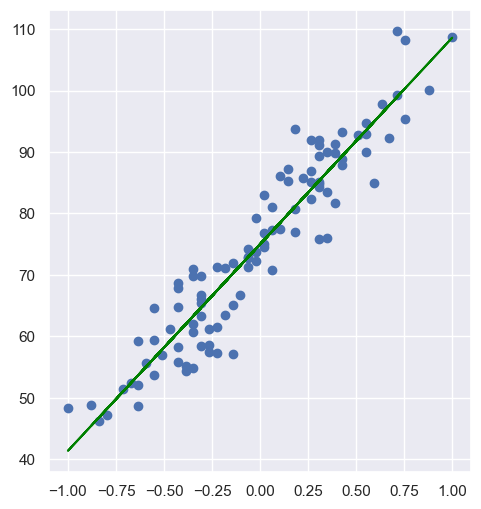

In [46]:
data = np.loadtxt('data/medidas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
print(x.shape, y.shape)
print(x)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

print(nn.layers[0].weights)
print(nn.layers[0].biases)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Exemplo Regressão Linear Multivariada

(25, 4)
(25, 3) (25, 1)
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-1.0 1.0000000000000004
epoch    0/1000 loss_train: 10213.32389618
epoch  100/1000 loss_train: 10.10204936
epoch  200/1000 loss_train: 6.55624156
epoch  300/1000 loss_train: 4.80514500
epoch  400/1000 loss_train: 3.91124238
epoch  500/1000 loss_train: 3.44545594
epoch  600/1000 loss_train: 3.19688204
epoch  700/1000 loss_train: 3.06066487
epoch  800/1000 loss_train: 2.98390682
epoch  900/1000 loss_train: 2.93943456
epoch 1000/1000 loss_train: 2.91298353
[[10.32944048 13.53100656 25.23141752]]
[[150.50096233]]


Text(0, 0.5, 'Valor Predito')

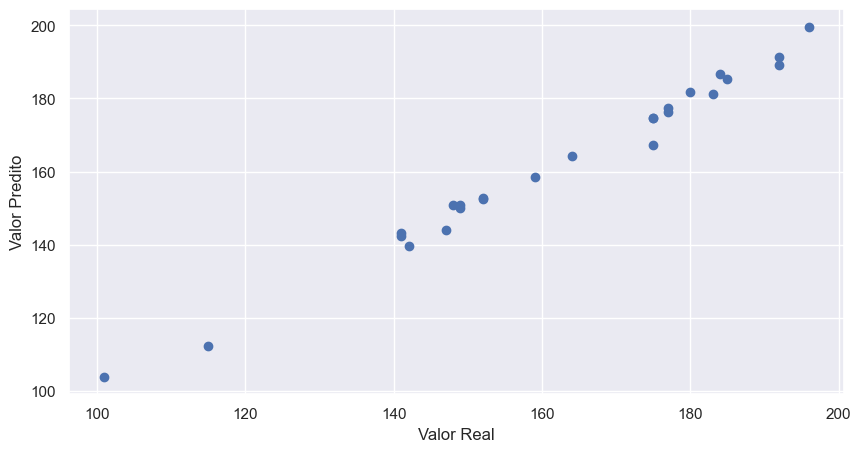

In [49]:
data = np.loadtxt('data/notas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,:-1], data[:,-1].reshape(-1,1)
print(x.shape, y.shape)
print(x)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

print(nn.layers[0].weights)
print(nn.layers[0].biases)

y_pred = nn.predict(x)

plt.scatter(y, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")

### Exemplo Regressão Quadrática

> 1. A Rede construída com 2 neuronios e uma learning rate maior ficou Underfittada, mas a Rede com 4 neuronios nas camadas ocultas e learning rate melhor ficou bem ajustada:

- Quando você usa ReLU, cada neurônio cria uma “quebra” na função aprendida, produzindo uma função linear por partes. Uma rede com poucas unidades ocultas consegue criar poucas regiões lineares; se essas regiões forem insuficientes para aproximar a curvatura de uma função quadrática , o modelo acaba se comportando quase como uma reta (underfitting). Além disso, se muitos neurônios ficarem na parte negativa da ReLU, o gradiente zera (derivada igual a 0), esses neurônios praticamente deixam de aprender e a rede perde ainda mais capacidade — podendo degenerar para uma transformação linear.

- Ao adicionar apenas um neurônio a mais em cada camada, você aumenta não apenas o número de parâmetros, mas o número de combinações possíveis entre ativações ao longo das camadas. Em redes profundas, isso aumenta de forma combinatória o número de regiões lineares que a função final pode representar. O backpropagation continua matematicamente igual, mas agora o espaço de funções que a rede consegue explorar é muito maior, permitindo que o gradiente encontre uma solução não-linear que ajuste melhor a parábola.

- Finalmente, com um learning_rate menor, o passo será menor, evitando a probabilidade de obtermos um mínimo local no cálculo das derivadas ao longo do Backpropagation

(100, 1) (100, 1)
[-1.] [1.]
epoch    0/1000 loss_train: 1046.38590629
epoch  100/1000 loss_train: 571.37281496
epoch  200/1000 loss_train: 507.73071543
epoch  300/1000 loss_train: 499.20396762
epoch  400/1000 loss_train: 498.06155672
epoch  500/1000 loss_train: 497.90849688
epoch  600/1000 loss_train: 497.88798998
epoch  700/1000 loss_train: 497.88524247
epoch  800/1000 loss_train: 497.88487436
epoch  900/1000 loss_train: 497.88482504
epoch 1000/1000 loss_train: 497.88481843


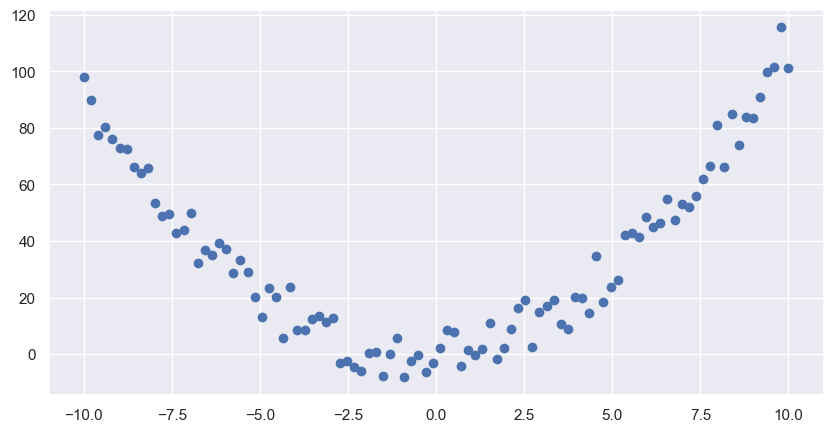

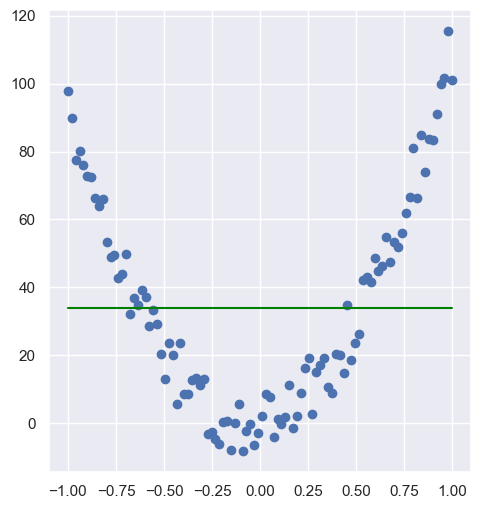

In [57]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)

print(x.shape, y.shape)
plt.scatter(x, y)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.01)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 3, activation = relu))
nn.layers.append(Layer(input_dim = 3, output_dim = 3, activation = relu))
nn.layers.append(Layer(input_dim = 3, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

(100, 1) (100, 1)
[-1.] [1.]
epoch    0/1000 loss_train: 1269.51512542
epoch  100/1000 loss_train: 312.27190691
epoch  200/1000 loss_train: 54.52762302
epoch  300/1000 loss_train: 27.46172088
epoch  400/1000 loss_train: 25.49583621
epoch  500/1000 loss_train: 25.31385545
epoch  600/1000 loss_train: 25.08599891
epoch  700/1000 loss_train: 24.94562639
epoch  800/1000 loss_train: 24.82011475
epoch  900/1000 loss_train: 24.69474783
epoch 1000/1000 loss_train: 24.57997094


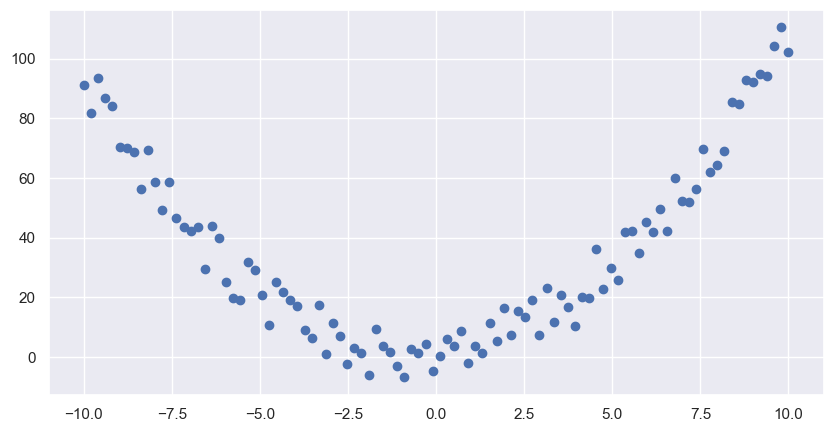

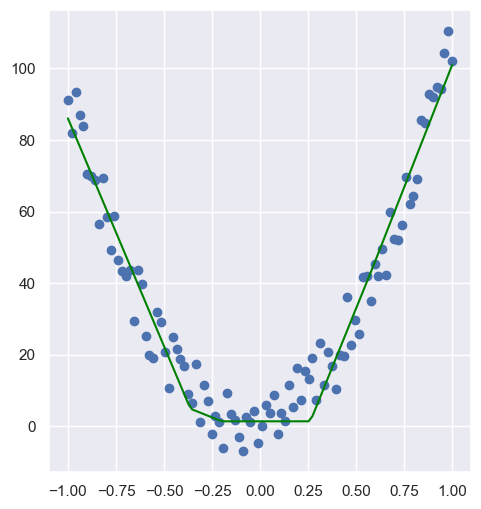

In [54]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)

print(x.shape, y.shape)
plt.scatter(x, y)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.001)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Cúbica

(100, 1) (100, 1)
[-1.] [1.]
epoch    0/1000 loss_train: 52.22097838
epoch  100/1000 loss_train: 31.36721304
epoch  200/1000 loss_train: 25.28839494
epoch  300/1000 loss_train: 15.29975597
epoch  400/1000 loss_train: 16.53060183
epoch  500/1000 loss_train: 9.31619146
epoch  600/1000 loss_train: 6.09936919
epoch  700/1000 loss_train: 4.18096509
epoch  800/1000 loss_train: 4.50313642
epoch  900/1000 loss_train: 3.23278188
epoch 1000/1000 loss_train: 3.11887361


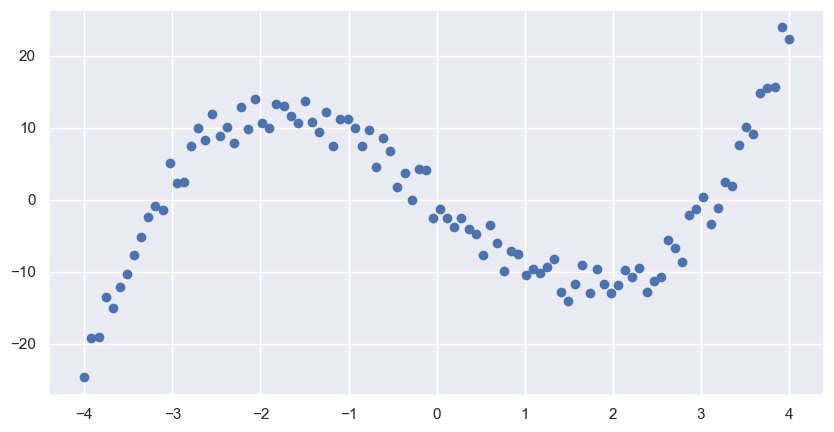

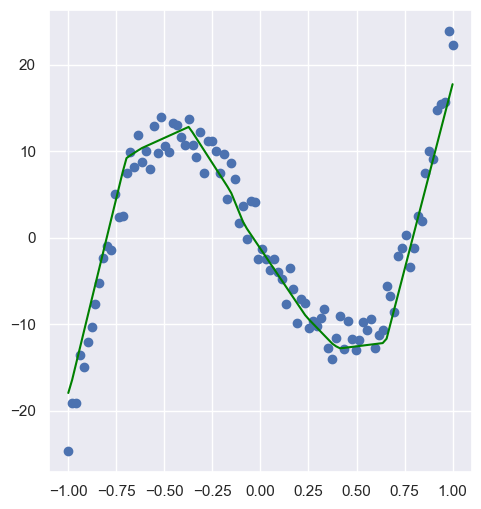

In [60]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)
plt.scatter(x, y)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.01)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Logarítmica

(100, 1) (100, 1)
[-1.] [1.]
epoch    0/1000 loss_train: 24.57813153
epoch  100/1000 loss_train: 0.06037080
epoch  200/1000 loss_train: 0.05343037
epoch  300/1000 loss_train: 0.04935578
epoch  400/1000 loss_train: 0.04639163
epoch  500/1000 loss_train: 0.04399770
epoch  600/1000 loss_train: 0.04204252
epoch  700/1000 loss_train: 0.04029754
epoch  800/1000 loss_train: 0.03878986
epoch  900/1000 loss_train: 0.03725432
epoch 1000/1000 loss_train: 0.03551869


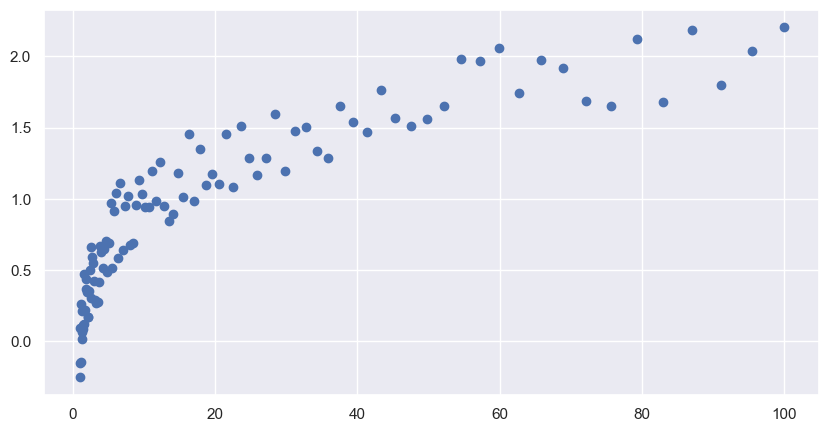

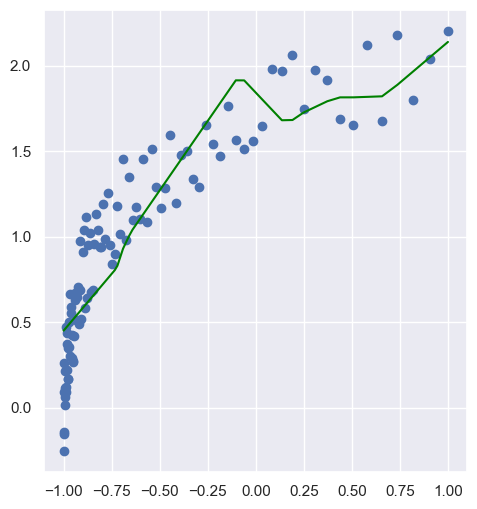

In [61]:
x, y = make_log10(n_samples=100, x_min=1, x_max=100, noise=0.3)

print(x.shape, y.shape)
plt.scatter(x, y)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.01)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Exponencial

(100, 1) (100, 1)
[-1.] [1.]
epoch    0/1000 loss_train: 844.48444847
epoch  100/1000 loss_train: 42.49236753
epoch  200/1000 loss_train: 73.63189107
epoch  300/1000 loss_train: 41.88311519
epoch  400/1000 loss_train: 30.18478661
epoch  500/1000 loss_train: 28.40645979
epoch  600/1000 loss_train: 31.33030164
epoch  700/1000 loss_train: 38.32556633
epoch  800/1000 loss_train: 26.17650883
epoch  900/1000 loss_train: 25.99047508
epoch 1000/1000 loss_train: 17.05861667


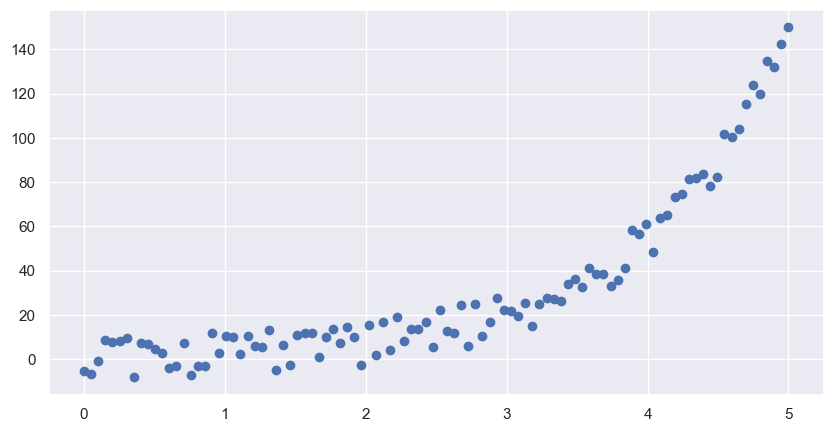

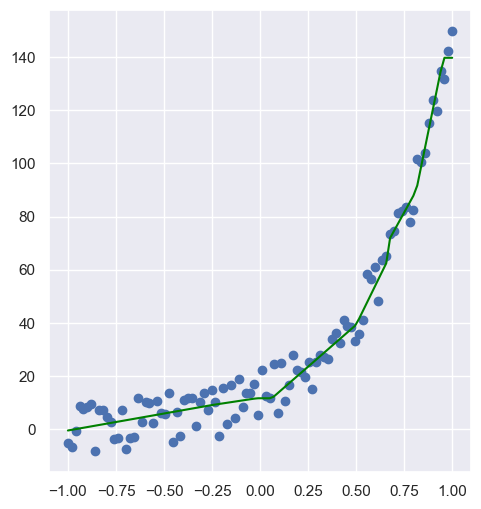

In [64]:
x, y = make_exp(n_samples=100, x_min=0, x_max=5, noise=10)

print(x.shape, y.shape)
plt.scatter(x, y)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 0.01)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = 10, activation = relu))
nn.layers.append(Layer(input_dim = 10, output_dim = output_dim, activation = linear))
nn.fit(x, y, epochs = 1000, verbose = 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Porta AND/OR

(4, 2) (4, 1)
epoch    0/1000 loss_train: 1.30615597
epoch  100/1000 loss_train: 0.13780533
epoch  200/1000 loss_train: 0.07962740
epoch  300/1000 loss_train: 0.05552398
epoch  400/1000 loss_train: 0.04244775
epoch  500/1000 loss_train: 0.03428246
epoch  600/1000 loss_train: 0.02871574
epoch  700/1000 loss_train: 0.02468489
epoch  800/1000 loss_train: 0.02163505
epoch  900/1000 loss_train: 0.01924894
epoch 1000/1000 loss_train: 0.01733229
Predições:
[[0.00001227]
 [0.02014351]
 [0.02014349]
 [0.97178701]]
Acurácia: 100.00%


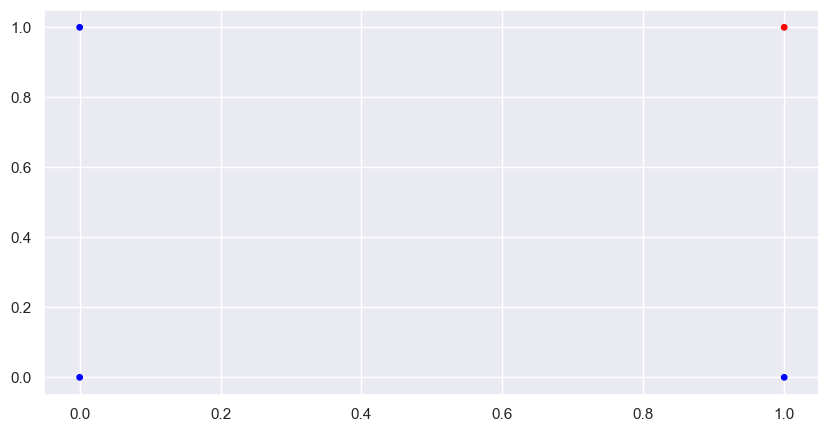

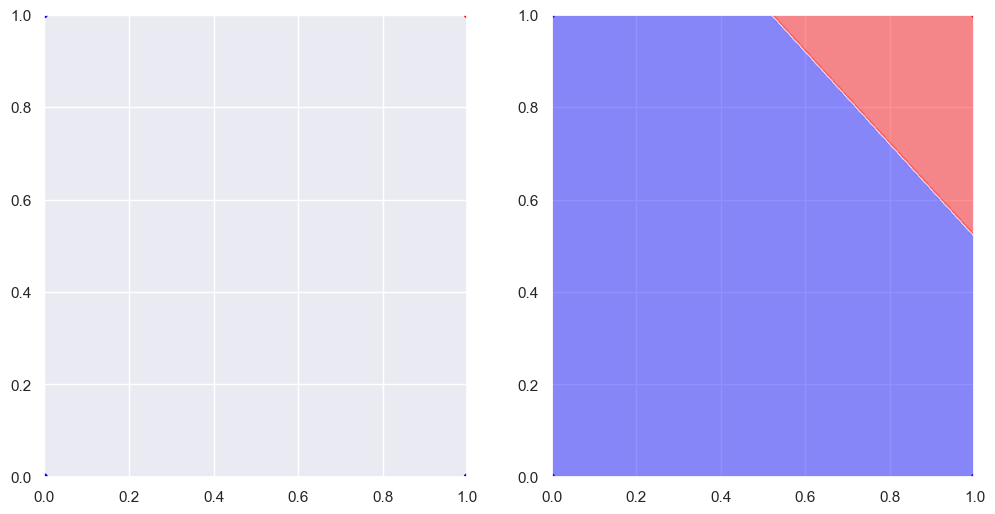

In [76]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]).reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn,  threshold= 0.5, cmap='bwr')

### Porta XOR

(4, 2) (4, 1)
epoch    0/1000 loss_train: 0.93884144
epoch  100/1000 loss_train: 0.69150363
epoch  200/1000 loss_train: 0.67882497
epoch  300/1000 loss_train: 0.60517231
epoch  400/1000 loss_train: 0.52300103
epoch  500/1000 loss_train: 0.43830854
epoch  600/1000 loss_train: 0.20266769
epoch  700/1000 loss_train: 0.08351152
epoch  800/1000 loss_train: 0.04829099
epoch  900/1000 loss_train: 0.03327889
epoch 1000/1000 loss_train: 0.02518896
Predições:
[[0.01814076]
 [0.97759814]
 [0.97776622]
 [0.03661992]]
Acurácia: 100.00%


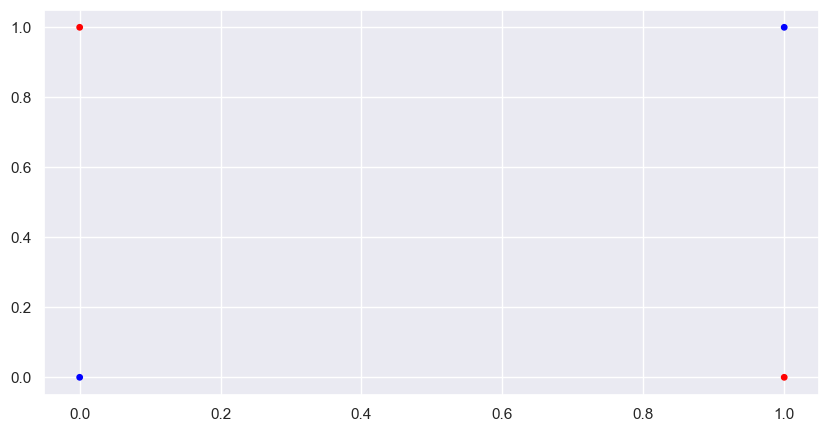

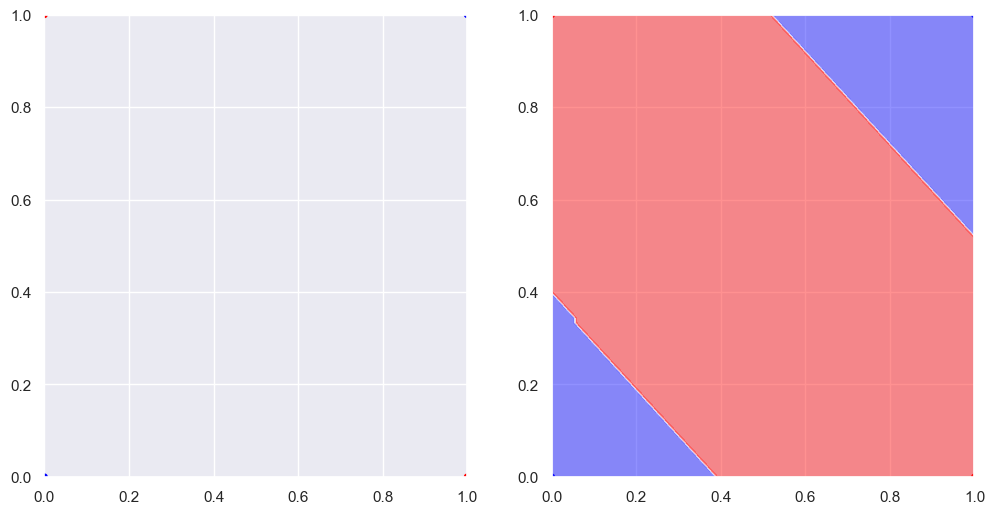

In [75]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 2, activation = sigmoid))
nn.layers.append(Layer(input_dim = 2, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### 2 Clusters

(100, 2) (100, 1)
epoch    0/1000 loss_train: 0.70408148
epoch  100/1000 loss_train: 0.04659602
epoch  200/1000 loss_train: 0.02353760
epoch  300/1000 loss_train: 0.01547219
epoch  400/1000 loss_train: 0.01084112
epoch  500/1000 loss_train: 0.00671416
epoch  600/1000 loss_train: 0.00436031
epoch  700/1000 loss_train: 0.00328897
epoch  800/1000 loss_train: 0.00271389
epoch  900/1000 loss_train: 0.00235829
epoch 1000/1000 loss_train: 0.00210633
Predições:
[[0.99863693]
 [0.00289524]
 [0.00210113]
 [0.99866691]
 [0.99864675]
 [0.00211614]
 [0.99861432]
 [0.00281788]
 [0.99857558]
 [0.99852989]
 [0.00234924]
 [0.9975746 ]
 [0.00210125]
 [0.00220906]
 [0.00211462]
 [0.00210334]
 [0.99864995]
 [0.99866313]
 [0.00219819]
 [0.99860306]
 [0.00209748]
 [0.99862458]
 [0.99863453]
 [0.99858342]
 [0.00217581]
 [0.99859734]
 [0.00212769]
 [0.99865737]
 [0.99859577]
 [0.99862713]
 [0.99803433]
 [0.99850797]
 [0.00210044]
 [0.00212087]
 [0.0021056 ]
 [0.99862902]
 [0.99865046]
 [0.99829515]
 [0.002808

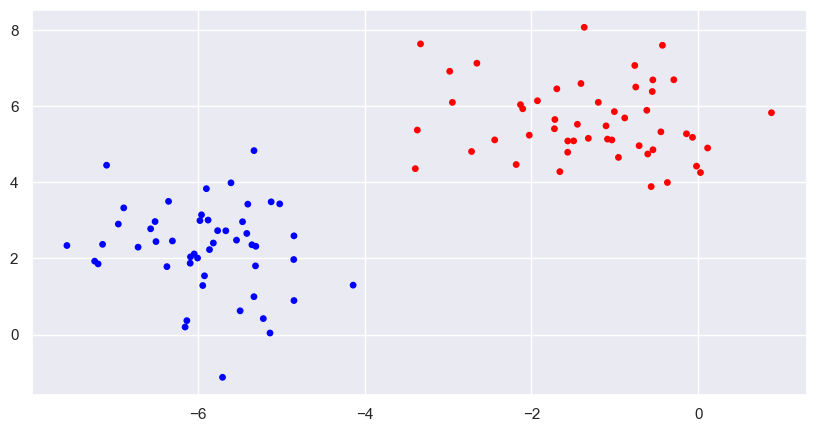

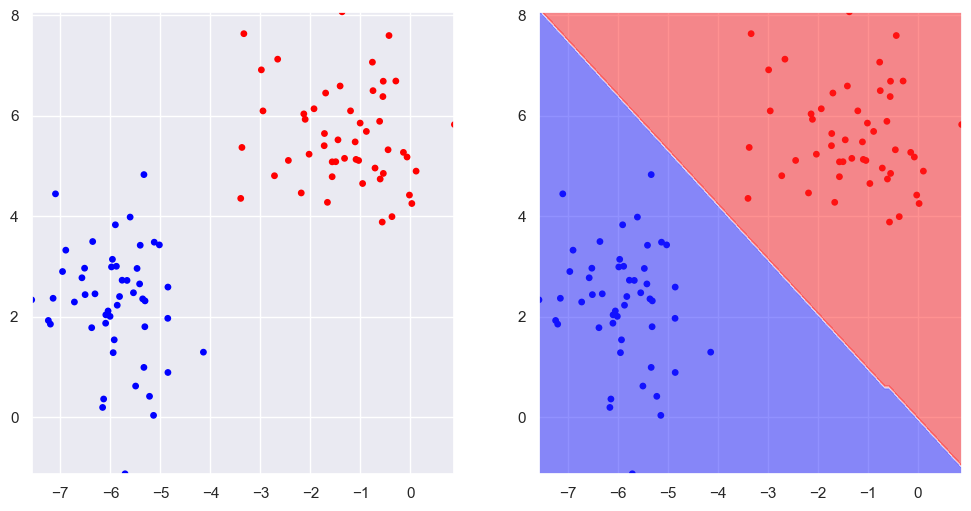

In [78]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 2, activation = sigmoid))
nn.layers.append(Layer(input_dim = 2, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### 4 Clusters

(500, 2) (500, 1)
epoch    0/1000 loss_train: 0.94256377
epoch  100/1000 loss_train: 0.16162163
epoch  200/1000 loss_train: 0.08603509
epoch  300/1000 loss_train: 0.06262701
epoch  400/1000 loss_train: 0.05165552
epoch  500/1000 loss_train: 0.04524186
epoch  600/1000 loss_train: 0.04094698
epoch  700/1000 loss_train: 0.03779331
epoch  800/1000 loss_train: 0.03531882
epoch  900/1000 loss_train: 0.03327851
epoch 1000/1000 loss_train: 0.03153081
Predições:
[[0.00264977]
 [0.99286621]
 [0.00060353]
 [0.0005162 ]
 [0.98958332]
 [0.01995583]
 [0.99112566]
 [0.99300638]
 [0.99150755]
 [0.99336763]
 [0.99249319]
 [0.00087072]
 [0.0233645 ]
 [0.02073199]
 [0.01775886]
 [0.03054499]
 [0.01890226]
 [0.0004534 ]
 [0.98883665]
 [0.99337746]
 [0.01788442]
 [0.99326992]
 [0.99036791]
 [0.01820742]
 [0.00151999]
 [0.01766587]
 [0.99215529]
 [0.99278573]
 [0.99517482]
 [0.99190822]
 [0.30459406]
 [0.0005727 ]
 [0.97571097]
 [0.9654114 ]
 [0.09503598]
 [0.02775375]
 [0.00055078]
 [0.97936437]
 [0.000483

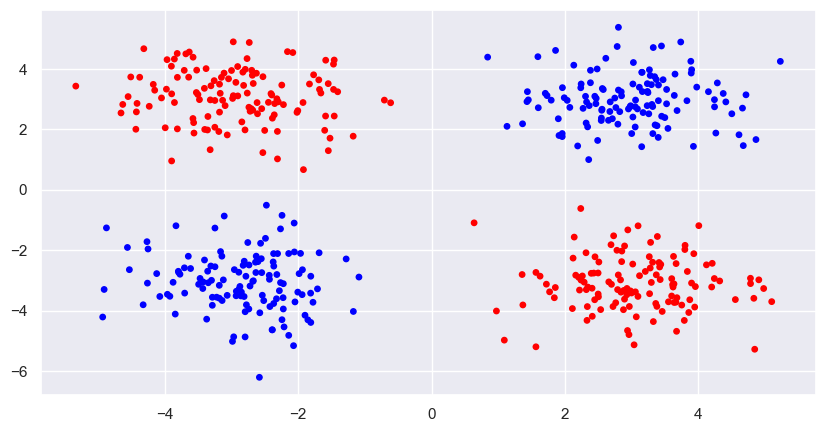

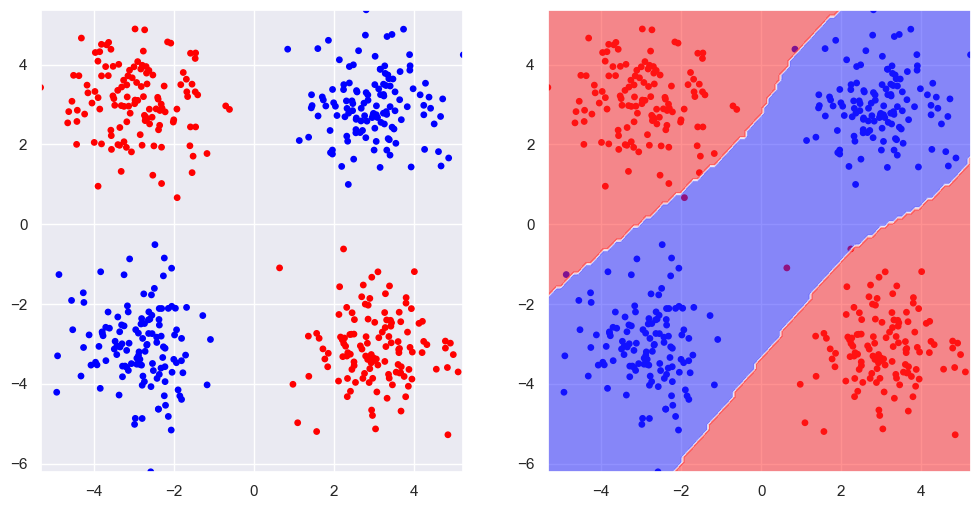

In [81]:
x, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.9, centers=[(-3, -3), (3, 3), (-3, 3), (3, -3)], random_state=1234)
y = y.reshape(-1, 1)
y = np.where(y >= 2, 1, 0)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 3, activation = sigmoid))
nn.layers.append(Layer(input_dim = 3, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### Círculos

(500, 2) (500, 1)
epoch    0/1000 loss_train: 0.82433073
epoch  100/1000 loss_train: 0.50658258
epoch  200/1000 loss_train: 0.30813643
epoch  300/1000 loss_train: 0.16766285
epoch  400/1000 loss_train: 0.10501982
epoch  500/1000 loss_train: 0.07432668
epoch  600/1000 loss_train: 0.05616084
epoch  700/1000 loss_train: 0.04477678
epoch  800/1000 loss_train: 0.03714074
epoch  900/1000 loss_train: 0.03161211
epoch 1000/1000 loss_train: 0.02750379
Predições:
[[0.00060271]
 [0.98926875]
 [0.98149541]
 [0.98408581]
 [0.00005738]
 [0.97597825]
 [0.989546  ]
 [0.0012154 ]
 [0.32016102]
 [0.98616167]
 [0.00233592]
 [0.98887179]
 [0.98794278]
 [0.98849054]
 [0.9872002 ]
 [0.97838804]
 [0.00343691]
 [0.04780579]
 [0.00002261]
 [0.9889152 ]
 [0.0000652 ]
 [0.00563607]
 [0.98933259]
 [0.01229526]
 [0.00001078]
 [0.00292119]
 [0.990465  ]
 [0.9661511 ]
 [0.97029908]
 [0.9762918 ]
 [0.98856826]
 [0.97627616]
 [0.97651375]
 [0.98275375]
 [0.00006154]
 [0.97355451]
 [0.03716458]
 [0.0093573 ]
 [0.000076

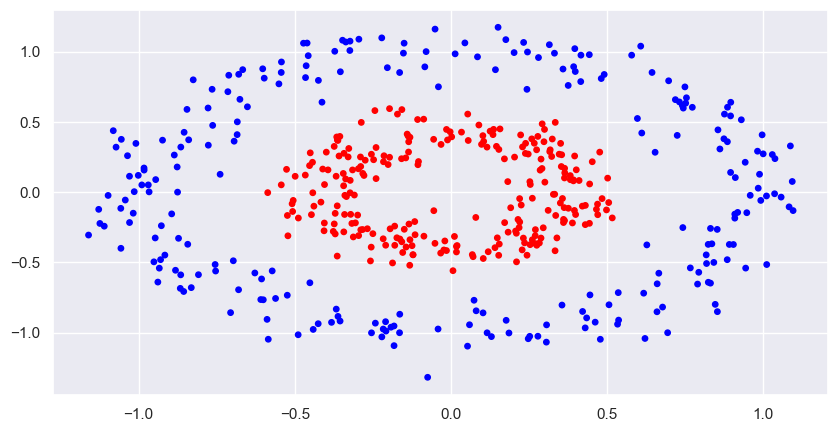

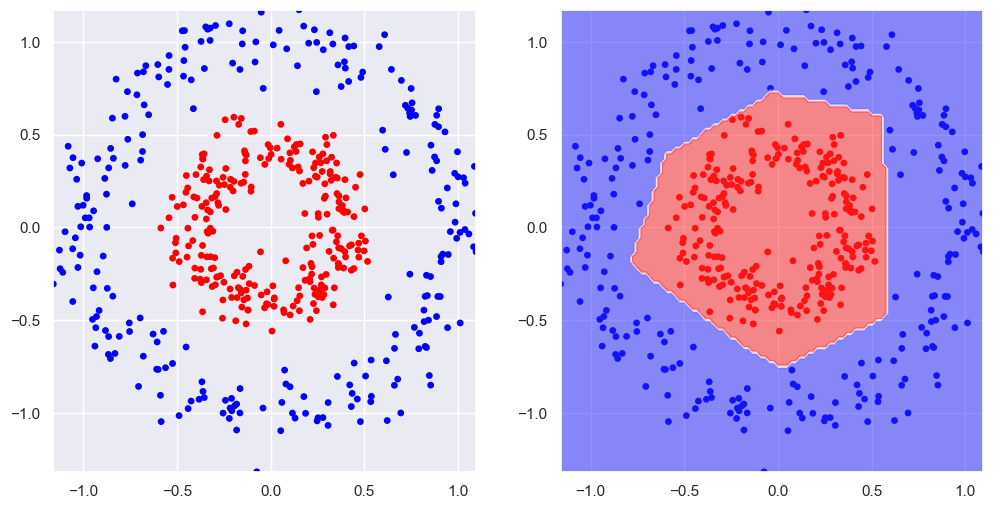

In [94]:
x, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 0.1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### Moons

(200, 2) (200, 1)
epoch    0/1000 loss_train: 0.74536482
epoch  100/1000 loss_train: 0.26052798
epoch  200/1000 loss_train: 0.19236482
epoch  300/1000 loss_train: 0.14615779
epoch  400/1000 loss_train: 0.11951438
epoch  500/1000 loss_train: 0.10549194
epoch  600/1000 loss_train: 0.09724273
epoch  700/1000 loss_train: 0.09203890
epoch  800/1000 loss_train: 0.08836468
epoch  900/1000 loss_train: 0.08558073
epoch 1000/1000 loss_train: 0.08338658
Predições:
[[0.98916246]
 [0.96660288]
 [0.99205252]
 [0.99294436]
 [0.82751643]
 [0.99779049]
 [0.99998365]
 [0.00002827]
 [0.98167525]
 [0.99704923]
 [0.99961796]
 [0.03737897]
 [0.00381987]
 [0.99921919]
 [0.99815944]
 [0.00006333]
 [0.99248088]
 [0.00007983]
 [0.01586206]
 [0.00008616]
 [0.00446718]
 [0.00040116]
 [0.02167735]
 [0.65679365]
 [0.00003172]
 [0.00446718]
 [0.00820937]
 [0.00023724]
 [0.92795943]
 [0.00488368]
 [0.94360281]
 [0.69901888]
 [0.49420493]
 [0.9106167 ]
 [0.73792888]
 [0.45765024]
 [0.26497662]
 [0.84248877]
 [0.016771

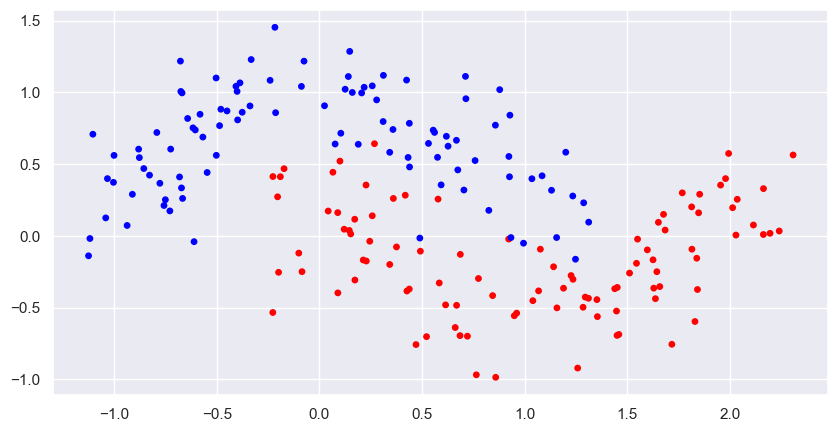

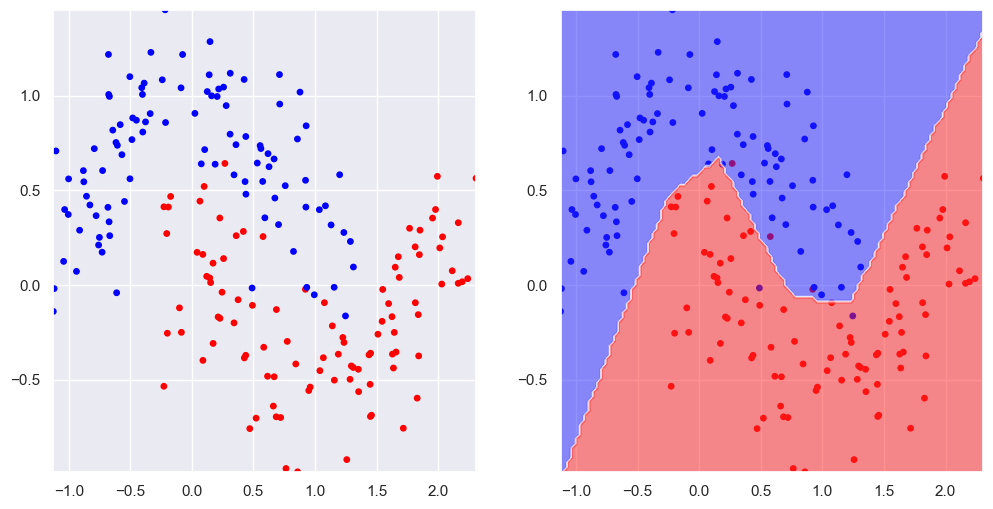

In [95]:
x, y = make_moons(200, noise=0.20)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 0.1)
nn.layers.append(Layer(input_dim = input_dim, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = 4, activation = relu))
nn.layers.append(Layer(input_dim = 4, output_dim = output_dim, activation = sigmoid))
nn.fit(x, y, epochs = 1000, verbose = 100)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

# <font color='green' style='font-size: 30px;'> 1.2) Tema 2 </font>
<hr style='border: 2px solid green;'>

In [ ]:
### Activate Functions
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

def leaky_relu(x, derivative=False):
    alpha = 0.1
    if derivative:
        return np.where(x <= 0, alpha, 1)
    return np.where(x <= 0, alpha*x, x)

def elu(x, derivative=False):
    alpha = 1.0
    if derivative:
        y = elu(x)
        return np.where(x <= 0, y + alpha, 1)
    return np.where(x <= 0, alpha*(np.exp(x) - 1), x)

def softmax(x, derivative=False):
    # Estabilidade numérica
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    exp = np.exp(x_shifted)
    return exp / np.sum(exp, axis=1, keepdims=True)

           
### Loss
def binary_cross_entropy(y, y_pred, derivative=False):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    n = y.shape[0]

    if derivative:
        # dL/dŷ
        return (y_pred - y) / (y_pred * (1 - y_pred) * n)

    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


def sigmoid_cross_entropy(y, y_pred, derivative = False):
    y_sigmoid = sigmoid(y_pred)
    if derivative:
        return -(y - y_sigmoid)/ y.shape[0]
    return -np.mean(y*np.log(y_sigmoid) + (1 - y)*np.log(1 - y_sigmoid))


def neg_log_likelihood(y_oh, y_pred, derivative=False):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    if derivative:
        y_pred[k] = (-1.0 / pk)
        return y_pred
    return np.mean(-np.log(pk))

def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    if derivative:
        return -(y_oh - y_softmax) / y_oh.shape[0]    
    return neg_log_likelihood(y_oh, y_softmax)

def mae(y, y_pred, derivative = False):
    if derivative:
        return np.where(y_pred > y, 1, -1)/y.shape[0]
    return np.mean(np.abs(y - y_pred))

def mse(y, y_pred, derivative=False):
    if derivative:
        return (y_pred - y) / y.shape[0]
    return 0.5 * np.mean((y - y_pred) ** 2)

class Layer(): 
    def __init__(self, input_dim, output_dim, activation=linear):
        
        # ================================
        # 🔷 ORIENTAÇÃO A OBJETOS
        # ================================
        # Cada instância de Layer representa uma camada densa (fully connected).
        # Ela encapsula:
        # - parâmetros treináveis (weights e biases)
        # - estado intermediário (input, ativações)
        # - gradientes calculados no backprop
        #
        # A rede neural será composta por vários objetos Layer.
        

        # ================================
        # 🔷 ESTADO DA CAMADA
        # ================================
        
        # Armazena a entrada recebida durante o forward pass.
        # Necessário para calcular gradientes depois (regra da cadeia).
        self.input = None 
        
        # Matriz de pesos W
        # Shape: (output_dim, input_dim)
        # Cada linha representa os pesos de um neurônio da camada.
        self.weights = np.random.randn(output_dim, input_dim)
        
        # Vetor de bias b
        # Shape: (1, output_dim)
        self.biases = np.random.randn(1, output_dim)
        
        # Função de ativação (ReLU, sigmoid, etc.)
        # Deve aceitar argumento derivative=True para backprop.
        self.activation = activation
        
        # Z = WX + b  (entrada da ativação)
        # Uso de "__" ativa name mangling (pseudo-privado)
        self._activ_inp = None
        
        # A = f(Z)  (saída da ativação)
        self._activ_out = None
        
        # Gradientes calculados no backprop
        self.dweights = None
        self.dbiases = None


class NeuralNetwork():
    def __init__(self, cost_func=mse, learning_rate=0.001):
        
        # ================================
        # 🔷 COMPOSIÇÃO (OO)
        # ================================
        # A rede neural NÃO herda de Layer.
        # Ela contém uma lista de Layer.
        # Isso caracteriza composição.
        self.layers = []
        
        # Função de custo (ex: MSE, Cross-Entropy)
        # Também deve aceitar derivative=True
        self.cost_funct = cost_func 
        
        # Taxa de aprendizado (η)
        self.learnin_rate = learning_rate


    def fit(self, x_train, y_train, epochs=100, verbose=10):
        
        # ================================
        # 🔷 LOOP DE TREINAMENTO
        # ================================
        # Implementa:
        # Forward → Loss → Backward → Update
        
        for epoch in range(epochs + 1):
            
            # Forward pass
            y_pred = self.__feedfoward(x_train)
            
            # Backpropagation
            self.__backprop(y_train, y_pred)

            # Monitoramento do erro
            if epoch % verbose == 0:
                loss_train = self.cost_funct(y_train, self.predict(x_train))
                print("epoch {0:=4}/{1} loss_train: {2:.8f}".format(epoch, epochs, loss_train))


    def predict(self, x):
        
        # Apenas executa forward pass.
        return self.__feedfoward(x)


    def __feedfoward(self, x):
        
        # ==========================================
        # 🔷 FORWARD PASS (PROPAGAÇÃO DIRETA)
        # ==========================================
        #
        # Implementa:
        #
        # Z = XW^T + b
        # A = f(Z)
        #
        # Vetorizado para todas as amostras.
        #
        
        # A primeira camada recebe a entrada da rede
        self.layers[0].input = x 
        
        # Itera camada atual e próxima camada
        # A camada dummy evita erro de indexação
        for current_layer, next_layer in zip(self.layers, self.layers[1:] + [Layer(0, 0)]):
            
            # Produto matricial
            # X shape: (batch_size, input_dim)
            # W.T shape: (input_dim, output_dim)
            # Resultado: (batch_size, output_dim)
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.biases
            
            # Armazena Z
            current_layer._activ_inp = y
            
            # Aplica ativação
            current_layer._activ_out = current_layer.activation(y)
            
            # Saída da camada atual vira entrada da próxima
            next_layer.input = current_layer._activ_out
        
        # Retorna saída da última camada
        return self.layers[-1]._activ_out


    def __backprop(self, y, y_pred):
        
        # ==========================================
        # 🔷 BACKPROPAGATION
        # ==========================================
        #
        # Implementa regra da cadeia:
        #
        # δ(L) = dL/dA(L)
        # δ(l) = f'(Z(l)) * δ(l+1)
        #
        # dW = δ^T X
        # db = soma(δ)
        #
        
        # Derivada da função de custo
        last_delta = self.cost_funct(y, y_pred, derivative=True)

        # Percorre camadas de trás para frente
        for layer in reversed(self.layers):
            
            # Derivada da ativação f'(Z)
            deactivation = layer.activation(layer._activ_inp, derivative=True) * last_delta 
            
            # Propaga erro para camada anterior
            last_delta = np.dot(deactivation, layer.weights)
            
            # Gradiente dos pesos
            # δ^T X
            layer.dweights = np.dot(deactivation.T, layer.input)
            
            # Gradiente dos bias
            # Soma do erro ao longo do batch
            layer.dbiases = deactivation.sum(axis=0, keepdims=True)

        # ==========================================
        # 🔷 ATUALIZAÇÃO DOS PARÂMETROS
        # ==========================================
        #
        # Gradient Descent:
        #
        # W = W - η * dW
        # b = b - η * db
        #
        
        for layer in reversed(self.layers):
            layer.weights = layer.weights - self.learnin_rate * layer.dweights
            layer.biases = layer.biases - self.learnin_rate * layer.dbiases



### Inicialização de pesos

### Gradient Checking

# <font color='orange' style='font-size: 40px;'> PyTorch Tutorial </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Tema 1 </font>
<hr style='border: 2px solid green;'>

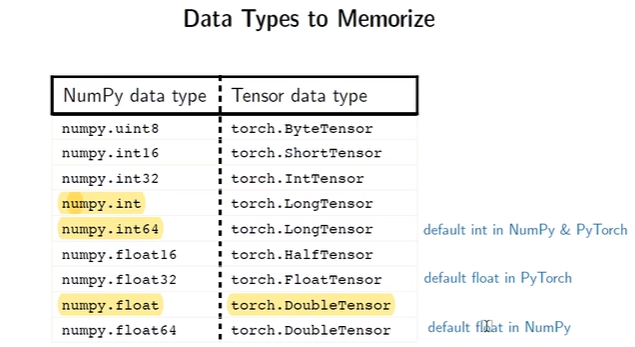


In [9]:
a = np.array([1, 2, 3]) 
b = torch.tensor([1, 2, 3])

print(a.dtype)
print(b.dtype)
print()
print(a.shape)
print(b.shape)
print()
print(a.dot(a))
print(b.dot(b))
print()
print(b.numpy())
print(torch.tensor(a))
print(torch.tensor([1, 2, 3], dtype = torch.float))

int64
torch.int64

(3,)
torch.Size([3])

14
tensor(14)

[1 2 3]
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [14]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6]) 

print('Multiplicação elemento a elemento: É uma operação entre matrizes ou vetores de mesmo tamanho e Cada elemento do resultado é a multiplicação dos elementos correspondentes:', a*b)
print('Produto Escalar: É uma operação que reduz dois vetores a um número (escalar) --> A⋅B=a1​b1​+a2​b2​+...+an​bn​:', a.dot(b))
print('Produto Vetorial: É uma operação que só existe em 3D e produz um vetor perpendicular aos dois vetores originais:', torch.cross(a, b))

Multiplicação elemento a elemento: É uma operação entre matrizes ou vetores de mesmo tamanho e Cada elemento do resultado é a multiplicação dos elementos correspondentes: tensor([ 4, 10, 18])
Produto Escalar: É uma operação que reduz dois vetores a um número (escalar) --> A⋅B=a1​b1​+a2​b2​+...+an​bn​: tensor(32)
Produto Vetorial: É uma operação que só existe em 3D e produz um vetor perpendicular aos dois vetores originais: tensor([-3,  6, -3])


In [17]:
X = torch.arange(6).reshape(2, 3)
print(X)
print()
w = torch.tensor([1, 2, 3])
print(w)
print()
print(X.matmul(w))
print()
w = w.reshape(-1, 1)
print(X.matmul(w))

tensor([[0, 1, 2],
        [3, 4, 5]])

tensor([1, 2, 3])

tensor([ 8, 26])

tensor([[ 8],
        [26]])


In [ ]:
X = torch.arange(50, dtype = torch.float).reshape(10, 5) # 10 amostras, com 5 features cada
fc_layer = torch.nn.Linear(in_features = 5, out_features = 3) # Estou tentando prever 3 classes a partir de 5 features
A = fc_layer(X) # A é a saída da camada totalmente conectada, que é o resultado da multiplicação de X pelas pesos da camada (fc_layer.weight) e adição do viés (fc_layer.bias)

print('X dim: ', X.size())
display(X)

print('W dim: ', fc_layer.weight.size())
display(fc_layer.weight)

print('b dim:  ', fc_layer.bias.size())
display(fc_layer.bias)


print('A dim: ', A.size())
display(A)

X dim:  torch.Size([10, 5])


tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])

W dim:  torch.Size([3, 5])


Parameter containing:
tensor([[ 0.0324,  0.2575,  0.3650, -0.0610, -0.2774],
        [-0.2140,  0.3757,  0.3187, -0.0767, -0.0145],
        [ 0.4342, -0.1019,  0.2187,  0.2634,  0.4020]], requires_grad=True)

b dim:   torch.Size([3])


Parameter containing:
tensor([-0.4468, -0.3997, -0.0070], requires_grad=True)

A dim:  torch.Size([10, 3])


tensor([[-0.7519,  0.3249,  2.7267],
        [ 0.8303,  2.2704,  8.8087],
        [ 2.4125,  4.2158, 14.8907],
        [ 3.9947,  6.1612, 20.9727],
        [ 5.5769,  8.1066, 27.0548],
        [ 7.1591, 10.0520, 33.1368],
        [ 8.7413, 11.9974, 39.2188],
        [10.3235, 13.9428, 45.3008],
        [11.9057, 15.8883, 51.3828],
        [13.4879, 17.8337, 57.4649]], grad_fn=<AddmmBackward0>)

# <font color='green' style='font-size: 30px;'> 1.2) Tema 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/purvitsharma/pytorch-deep-learning-tutorial-zero-to-hero

# <font color='orange' style='font-size: 40px;'> Multilayer Perceptron </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/renangomes/solu-o-simplificada-utilizando-mlp-pt-br

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/androbomb/simple-nn-with-python-multi-layer-perceptron

# <font color='green' style='font-size: 30px;'> 1.3) Teste 3 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/mishra1993/pytorch-multi-layer-perceptron-mnist

# <font color='orange' style='font-size: 40px;'> Redes Neurais Convolucionais </font>
<hr style='border: 2px solid orange;'>



# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/mishki/getting-started-with-deep-learning-cnn-pytorch

# <font color='orange' style='font-size: 40px;'> Redes Neurais Recorrentes </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/codeblogger/recurrent-neural-network-rnn-tutorial

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch

# <font color='orange' style='font-size: 40px;'> Autoencoders </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/rockystats/understanding-auto-encoders

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kazushiadachi/autoencoder-and-variational-autoencoder-tutorial

# <font color='orange' style='font-size: 40px;'> Redes Neurais Adversariais Tutorial </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/salmaneunus/a-tutorial-to-start-your-first-gan-journey

# <font color='orange' style='font-size: 40px;'> NLP Tutorial </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert

# <font color='orange' style='font-size: 40px;'> Transformers </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/discussions/getting-started/587250

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://medium.com/@ian.barreiro/transformers-uma-implementa%C3%A7%C3%A3o-em-python-b9eb9305482d

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://airtonlirajr.medium.com/criando-um-llm-do-zero-com-transformers-f97e3436eea4

# <font color='green' style='font-size: 30px;'> 1.3) Teste 3 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/divyapatel4/transformer-implementation-training

# <font color='green' style='font-size: 30px;'> 1.4) Teste 4 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/alejopaullier/introduction-to-transformers